<a href="https://colab.research.google.com/github/Obreintelly/Nairobi_Hospital_Hypothyroid_Model/blob/main/Nairobi_Hospital_Hypothyroidism_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Overview**

**a) Research Question**

In this study, we will be analyzing Hypothyrodism data with a view to building a model that determines whether given a patient's symptoms, they have hypothyroid


**b) Defining the Success Metric**

The success metric for this research will be a classifier model with the highest accuracy level

**c) Understanding the Context**

Nairobi Hospital is a premier institution providing top class health care services in Kenya. As a health institution, understanding disease patterns and trends is key in providing targeted, expeditious and effective treatment. This prediction model would go a long way in meeting this important goal for Nairobi Hospotal. 

**d) Experimetal Design**


a) Data Cleaning/Preparation

b) Exploratory Data Analysis

c) Building the Models

d)Conclusions


**e) Data Report**

More details are captured in the attached data report: https://drive.google.com/file/d/1s-qhcn1_6ZU51h3_ynTtVQKRl0p8wB5e/view?usp=sharing

# **2. Importing Libraries/ Loading Dataset**

In [276]:
#Importing Pandas library
import pandas as pd

#Importing Numpy Library
import numpy as np

#Importing Matplotlib Library

import matplotlib.pyplot as plt

#Importing Seaborn Library

import seaborn as sns

sns.set_theme()

#sns.set_palette('bright')


#Importing Scipy
import scipy
#Importing SKLearn
import sklearn

import warnings
warnings.filterwarnings("ignore")

# Loading Our Dataset

In [277]:
#Loading Our Dataset and assigning it as df
df = pd.read_csv('/content/hypothyroid.csv')


# Previewing Our Dataset

In [278]:
#Displaying the first 5 rows of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


In [279]:
#Displaying the last five rows in our dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.8,y,139,y,0.97,y,143,n,?


In [280]:
# Checking size of Our Dataset
print('Our Dataset has: {} Rows, {} Columns'.format(*df.shape))


Our Dataset has: 3163 Rows, 26 Columns


In [281]:
#Exploring Our columns further, checking for missing values and 
#the datatypes in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# **3. Data Cleaning**

In this section, before embarking on data analysis, we will first ensure that our data complies with the following Data Science Principles:


Validity

Accuracy

Consistency

Completeness

Uniformity



# **Accuracy/Validity**

In [282]:
#What unique values do we have in Our dataset?
df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

# **Columns Validation**

Our columns description have been validated from the following sources:

1. https://www.gerties.org/conditions/thyroid-disease/
2.https://www.piedmont.org/living-better/the-difference-between-hypothyroidism-and-hyperthyroidism 
3. https://www.healthline.com/health/serum-tbg-level

In [283]:
#Age - Ageof Patient
#Sex - Sex of Patient
#on_thyroxine - whether one is on thyroxine or not
#query_on_thyroxine
#on_antithyroid_medicationthyroid_surgery
#query_hypothyroid - Whether or not patient had hypothyroid symptoms
#Hypothyroidism causes symptoms like slowed metabolism, tiredness, and weight gain. 
#Having an underactive thyroid can decrease or slow down your bodily functions

#query_hyperthyroid - Whether or not patient had hyperthyroid.Hyperthyroidism, 
#cause more energy, as opposed to less.One may experience weight loss as opposed to weight gain

#pregnant
#sick
#tumor
#lithium- Checking whether there were traces of Lithium or not. 
#Lithium use is associated with an increased risk of hypothyroidism
#goitre - Abnormal enlargement of thyroid glands
#TSH_measured - Whether TSH levels have been measured or not
#TSH -Levels ofthyroid stimulating hormone (TSH) circulating in the blood
#T3_measured - Whether T3 was measured or not
#T3 -For thyroxine to be active it is converted to triiodothyronine or T3. Blood levels of T3 is useful in evaluating for hyperthyroidism
#TT4_measured - Whether T4 was measured
#TT4 - Blood levels of freely circulating Thyroxine, or free T4 will be found to be low in hypothyroidism
#FTI - A low TSH and low FT4 or FTI indicates hypothyroidism due to a problem involving the pituitary gland
#TBG - Thyroxine-Binding Globulin- Serum TBG measurement in blood enables
#doctors detect thyroid problems

In [284]:
#Exploring the Unique values further

#Status


df.status.unique()

array(['hypothyroid', 'negative'], dtype=object)

In [285]:
#We have an expected(?) value in Our sex Column
df.sex.unique()

array(['M', 'F', '?'], dtype=object)

In [286]:
#We have 73 rows where the sex is not known.
#
df[df['sex']=='?']

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
59,hypothyroid,?,?,f,f,f,f,f,f,f,f,f,f,f,y,24,y,0.6,y,21,y,0.97,y,22,n,?
143,hypothyroid,?,?,f,f,f,f,f,f,f,f,f,f,f,y,7.5,y,1.2,y,37,y,1.06,y,35,n,?
177,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,y,1.5,y,1.7,y,75,y,0.84,y,89,n,?
179,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,y,260,y,0.31,y,839,n,?
279,negative,56,?,t,f,f,f,f,f,f,f,f,f,f,y,0,n,?,y,178,y,1.11,y,161,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,y,9.6,y,4.8,y,168,y,0.28,y,612,n,?
3091,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,n,?,n,?,y,175,y,0.86,y,204,n,?
3095,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1,y,83,y,0.73,y,115,n,?
3100,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,y,8.2,y,3.8,y,124,y,0.29,y,428,n,?


In [287]:
#We expect False and True
df.on_thyroxine.unique()

array(['f', 't'], dtype=object)

In [288]:
#We expect False and True entries
df.query_on_thyroxine.unique()

array(['f', 't'], dtype=object)

In [289]:
#We expect True and False entries
df.on_antithyroid_medication.unique()

array(['f', 't'], dtype=object)

In [290]:
#We have (?) entries that will have to be dealt with
df.T3.unique()

array(['0.6', '1.7', '0.2', '0.4', '1.2', '1.1', '1.3', '1.9', '?', '0.8',
       '2.2', '1.5', '2.7', '2', '0.3', '2.1', '0.5', '0.7', '1', '1.4',
       '2.3', '2.4', '0.9', '1.8', '0', '2.8', '1.6', '6.7', '3.3', '3',
       '2.5', '2.6', '4', '9.8', '3.9', '3.4', '3.8', '4.5', '3.2', '3.7',
       '4.3', '2.9', '3.1', '3.5', '3.6', '6.6', '4.9', '8.9', '4.1', '5',
       '5.3', '7.6', '7.3', '4.2', '4.4', '5.1', '7', '0.1', '0.05',
       '4.7', '6.2', '5.5', '4.6', '6.1', '8.1', '5.2', '5.6', '4.8',
       '10.2', '8.6'], dtype=object)

In [291]:
#We have (?) entries that will have to be dealt with
df.TSH.unique()

array(['30', '145', '0', '430', '7.3', '138', '7.7', '21', '92', '48',
       '36', '15', '15.3', '25', '61', '28', '170', '54', '216', '56',
       '71', '46', '70', '34', '53', '9.4', '126', '10', '530', '35',
       '65', '57', '125', '23', '80', '117', '49', '66', '8.2', '150',
       '?', '18', '165', '164', '24', '90', '77', '19', '58', '100',
       '213', '17', '235', '153', '13', '31', '109', '260', '43', '12',
       '11', '55', '6.5', '20', '7.5', '14', '60', '140', '33', '8.7',
       '0.25', '10.7', '82', '45', '42', '41', '160', '16', '89', '44',
       '176', '6.4', '183', '29', '37', '39', '7.9', '59', '68', '38',
       '47', '143', '6.6', '288', '96', '0.5', '1.2', '1.9', '0.09',
       '3.1', '0.4', '0.85', '0.3', '0.9', '1.5', '4.6', '0.2', '5.8',
       '4', '1.4', '2', '2.6', '2.9', '0.8', '4.9', '10.3', '2.3', '0.7',
       '0.6', '1.3', '2.5', '5.1', '1.7', '2.7', '22', '8.1', '3.3', '5',
       '3.2', '1.8', '1.1', '0.46', '1', '5.6', '4.4', '16.5', '2.1',
    

In [292]:
#THis column is as expected
df.TT4.unique()

array(['15', '19', '4', '6', '57', '27', '54', '34', '39', '7.6', '53',
       '38', '98', '44', '37', '81', '13', '17', '12', '50', '23', '14',
       '3.9', '52', '32', '30', '84', '10', '55', '24', '28', '11', '6.6',
       '31', '33', '41', '9', '78', '42', '8.1', '65', '16', '9.7', '46',
       '22', '61', '2.3', '21', '7.5', '18', '66', '25', '43', '2', '3',
       '58', '59', '71', '74', '56', '40', '20', '48', '230', '70', '4.1',
       '63', '5.3', '2.9', '62', '75', '68', '45', '47', '36', '80',
       '109', '8.6', '83', '82', '101', '76', '103', '112', '206', '110',
       '93', '79', '121', '?', '107', '88', '187', '254', '115', '113',
       '260', '117', '164', '97', '64', '129', '111', '106', '95', '87',
       '105', '90', '67', '134', '35', '193', '143', '130', '108', '86',
       '96', '92', '99', '216', '152', '125', '138', '194', '91', '120',
       '102', '170', '126', '116', '140', '94', '159', '85', '210', '89',
       '151', '247', '139', '153', '178', '123', '

In [293]:
#We have (?) entries that will have to be dealt with
df.T4U.unique()

array(['1.48', '1.13', '1', '1.04', '1.28', '1.19', '0.86', '1.05',
       '1.21', '1.02', '0.92', '1.29', '0.98', '1.08', '1.01', '1.18',
       '1.1', '1.27', '0.83', '1.11', '0.78', '1.39', '1.12', '0.93',
       '0.99', '0.9', '1.06', '0.68', '0.67', '1.14', '0.8', '0.96',
       '0.95', '1.46', '1.03', '0.97', '0.94', '1.09', '1.24', '1.23',
       '1.53', '1.26', '1.4', '1.17', '0.87', '0.61', '0.7', '1.07',
       '1.73', '1.45', '1.2', '0.89', '0.84', '0.91', '0.85', '1.35',
       '0.82', '1.5', '0.74', '1.71', '1.79', '0.73', '0.77', '1.25', '?',
       '0.88', '0.72', '0.31', '0', '0.79', '0.81', '0.71', '1.93',
       '1.32', '0.66', '1.68', '1.42', '1.7', '1.83', '1.41', '1.34',
       '1.65', '1.22', '0.75', '1.74', '0.69', '1.51', '0.76', '1.16',
       '0.35', '0.62', '0.54', '1.36', '1.33', '1.3', '0.48', '1.59',
       '1.75', '1.86', '1.38', '1.43', '1.62', '2.01', '0.3', '1.31',
       '1.15', '1.57', '0.55', '1.66', '0.52', '1.97', '1.47', '0.36',
       '1.88', '1

In [294]:
#We have (?) entries that will have to be dealt with
df.FTI.unique()

array(['10', '17', '0', '6', '44', '23', '63', '32', '7.5', '61', '41',
       '76', '45', '34', '81', '11', '16', '46', '22', '12', '5', '47',
       '29', '37', '60', '8.4', '8.5', '24', '28', '7', '49', '36', '15',
       '9', '80', '53', '7.2', '68', '6.6', '48', '21', '14', '2', '20',
       '1.4', '56', '3', '51', '13', '43', '78', '52', '64', '26', '35',
       '31', '133', '3.4', '54', '8.9', '57', '5.5', '58', '55', '2.8',
       '66', '4', '40', '50', '8.7', '87', '89', '112', '123', '99', '92',
       '104', '69', '196', '107', '106', '74', '97', '?', '122', '84',
       '114', '124', '241', '119', '120', '136', '85', '127', '839',
       '137', '197', '96', '77', '108', '82', '72', '94', '91', '240',
       '121', '109', '79', '100', '98', '73', '117', '165', '103', '88',
       '101', '126', '132', '128', '143', '152', '141', '186', '113',
       '102', '125', '93', '105', '159', '188', '71', '149', '116', '83',
       '176', '161', '86', '140', '111', '158', '115', '171',

In [295]:
#We have missing entries in the TBG column
df.TBG.unique()

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.1', '38', '108', '20', '36', '17', '23',
       '35', '32', '63', '9.3', '15', '26', '33', '41', '110', '22', '43',
       '53', '80', '47', '29', '13', '24', '18', '45', '86', '50', '8.4',
       '52', '11', '12', '14', '65', '7.3', '8.5', '69', '122'],
      dtype=object)

# Consistency

In [296]:
#We will denote all non-valid entries as missing entries and then checlk for the 
#missing values in our dataset
df.replace('?', np.nan, inplace=True)

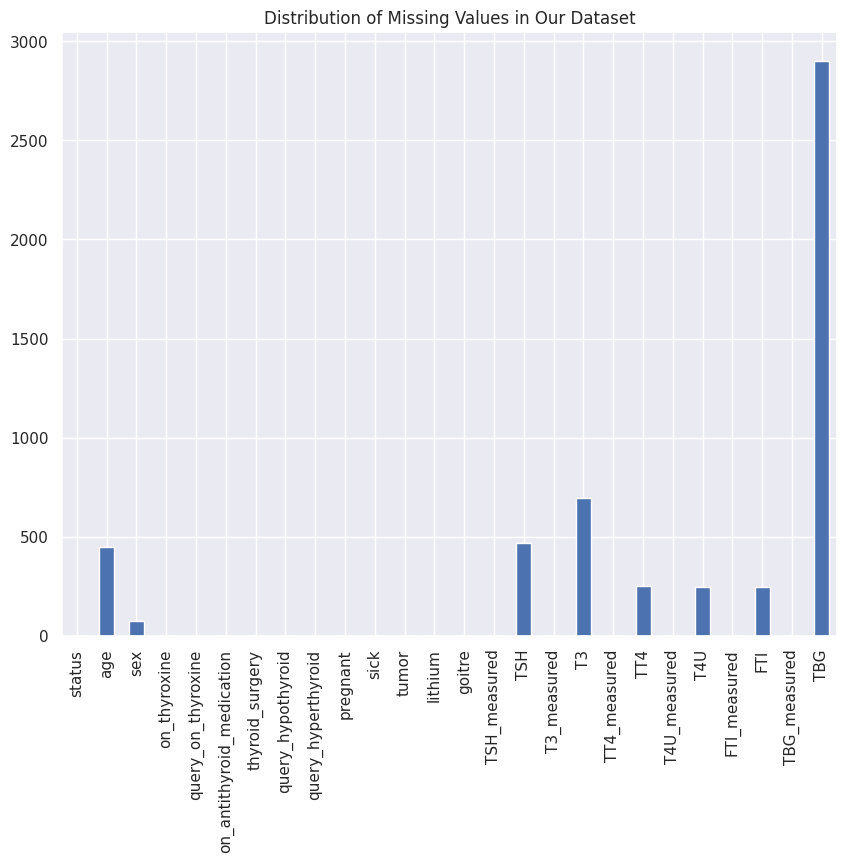

In [297]:
#Checking for missing values
plt.figure(figsize=(10, 8), dpi=100)
df.isna().sum().plot(kind='bar')
plt.title('Distribution of Missing Values in Our Dataset');

In [298]:
#To make a decision on how to address the missing values in Our dataset,
#determining their percentages will be an important first step.


#Deriving percentage of missing values
100 *df.isna().sum()/len(df)

#Creating a function to help us derive the percentages

def percent_missing(df):
  percent_na = 100 *df.isna().sum()/len(df)
  percent_na = percent_na[percent_na>0].sort_values()

  return percent_na

percent_na = percent_missing(df)

percent_na

sex     2.307936
FTI     7.809042
T4U     7.840658
TT4     7.872273
age    14.100537
TSH    14.796080
T3     21.972811
TBG    91.779956
dtype: float64

In [299]:
#Although from our validation studies, TBG levels are a crucial
#determinant for Hyper/Hypothyroidism, we have too many missing
#values that it would almost impossible to come up with a 
#meaningful cure. The best decision to make at this stage is to just drop this 
#column

#We can take comfort in the fact that in any case, T3 and T4 which cling on TBG
# and determine to a large extend its values are still available in our dataset


df.drop('TBG', axis=1, inplace=True)

In [300]:
#Displaying Summary Statistics to help make a decision on how to deal with the 
#remaining missing values 
df.describe().T

,count,unique,top,freq
status,3163,2,negative,3012
age,2717,92,60,64
sex,3090,2,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


# Feature Engineering

In [301]:
#To better address the Missing Values issue, we undertake a bit of feature engineering
#We convert our rows with 'f' to 0 and 't' to 1 and same for Female and Male rows
df.replace({"y":1,"n":0, "t":1, "f":0, "M":1, "F":0}, inplace=True)

In [302]:
#df.info()

In [303]:
#From the Summary Statistics above, the Female Gender is the top count
#We make the assumption that missing values will belong to this gender
df.sex.mode()

#df['sex'] = df.sex.astype(int)
df['sex'].fillna(0, inplace = True)


In [304]:
#Since the following columns are Objects, we need to convert them to either ints
#or floats in order to do any manioulation on them
df['age'] = df['age'].astype(float)
df['TSH'] = df.TSH.astype(float)
df['T3'] = df.T3.astype(float)
df['TT4'] = df.TT4.astype(float)
df['FTI'] = df.FTI.astype(float)


In [305]:
#For the following Numerical Columns, we shall fill them with mean and median values
df['age'].fillna(df['age'].mean(), inplace = True)
df['TSH'].fillna(df['TSH'].mean(), inplace = True)
df['T3'].fillna(df['T3'].median(), inplace = True)
df['TT4'].fillna(df['TT4'].median(), inplace = True)
df['FTI'].fillna(df['FTI'].median(), inplace = True)
df['T4U'].fillna(df['T4U'].median(), inplace = True)

In [306]:
#Previewing Our first 5 rows
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,hypothyroid,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,hypothyroid,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1,1,0.0,0
3,hypothyroid,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,hypothyroid,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


In [307]:
#Checking whether we still have missing values

df.isna().any().sum()

0

# Consistency

In [308]:
#We check for duplicates in Our dataset

df.duplicated().any().sum()

1

In [309]:
#Dropping the Duplicate
df = df.drop_duplicates()

In [310]:
#Confirming we do not have anymore duplicates

df.duplicated().any()

False

# **Outliers**

In [311]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3007.0,51.350030,17.864731,1.0,38.0,51.154214,64.0,98.0
sex,3007.0,0.295643,0.456407,0.0,0.0,0.000000,1.0,1.0
on_thyroxine,3007.0,0.148321,0.355477,0.0,0.0,0.000000,0.0,1.0
query_on_thyroxine,3007.0,0.018291,0.134023,0.0,0.0,0.000000,0.0,1.0
on_antithyroid_medication,3007.0,0.013967,0.117375,0.0,0.0,0.000000,0.0,1.0
thyroid_surgery,3007.0,0.034253,0.181910,0.0,0.0,0.000000,0.0,1.0
query_hypothyroid,3007.0,0.078151,0.268454,0.0,0.0,0.000000,0.0,1.0
query_hyperthyroid,3007.0,0.075491,0.264225,0.0,0.0,0.000000,0.0,1.0
pregnant,3007.0,0.020286,0.141000,0.0,0.0,0.000000,0.0,1.0
sick,3007.0,0.032258,0.176714,0.0,0.0,0.000000,0.0,1.0


In [312]:
#Comparing Our values to the min, 25%, 50% , 75% and max values, it is clear we
#have outliers in our dataset. We howevwe, make the decision not to deal with them at this
#stage or at all. 

# **Saving Our Dataset**

In [313]:
#Saving Our Clean Dataset
df.to_csv('hypo.csv', index=False)

# **4. Exploratory Data Analysis**

In [314]:
df= pd.read_csv('hypo.csv')

In [315]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,hypothyroid,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,hypothyroid,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,hypothyroid,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,hypothyroid,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


# Univariate Analysis

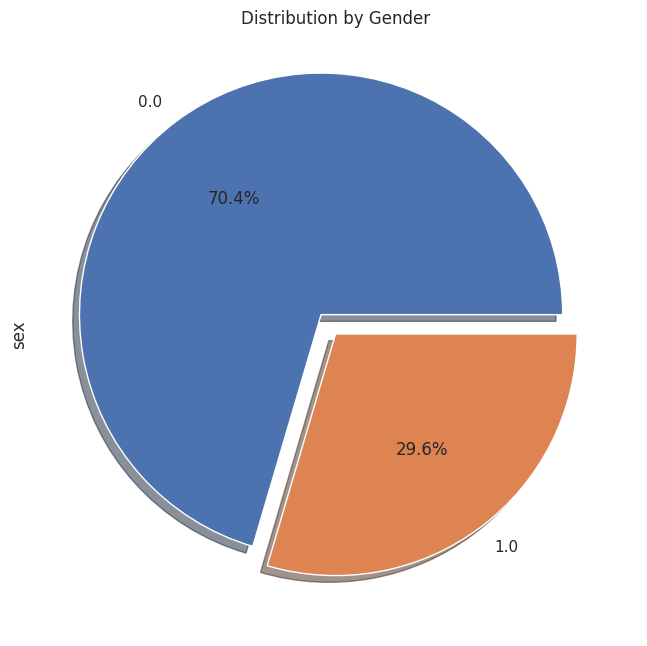

In [316]:
#Distribution of Female Vs Male in Our dataset
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.sex.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution by Gender');

In [317]:
#0 represents Females while 1 represents male
#There were more Female patients in the study than male patients

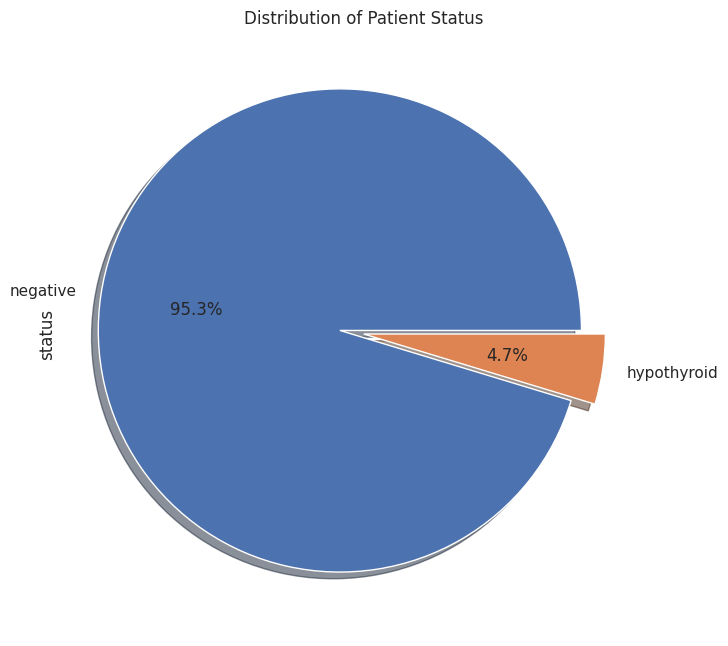

In [318]:
#Distribution of Patient Status
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.status.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patient Status');

In [319]:
#We have more number of patients with a negative status than those who return 
# Positive Thyroid Test. Only 5% of patients were hypothyroid positive

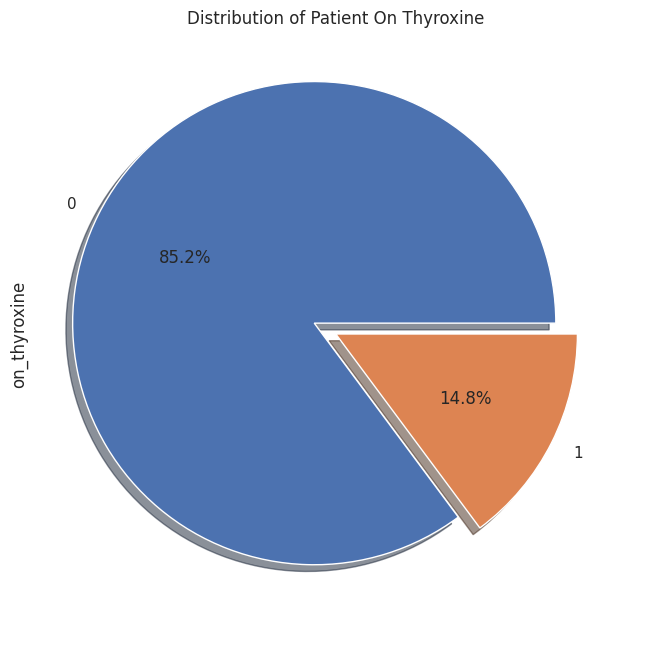

In [320]:
#Distribution of Patients On Thyroxine
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.on_thyroxine.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patient On Thyroxine');

In [321]:
#Only 15% of the patients were on thyroxine

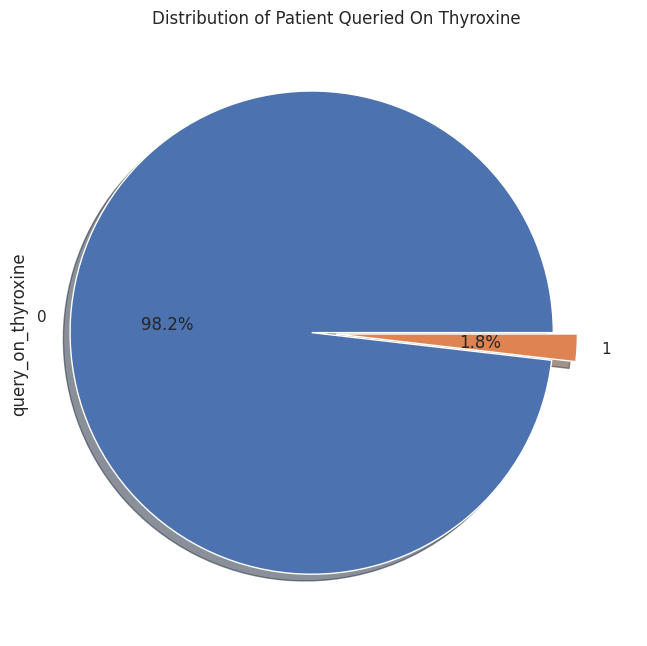

In [322]:
#Distribution of Patients Queried About Thyroxine
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.query_on_thyroxine.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patient Queried On Thyroxine');

In [323]:
#Only about 2% of the patients were queried on thyroxine. 

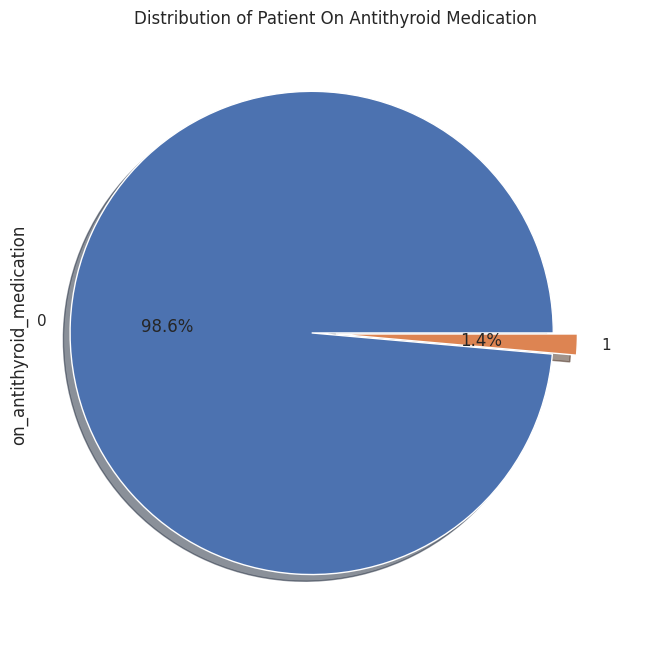

In [324]:
#Distribution of On Patients on Antithyroid Medication
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.on_antithyroid_medication.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patient On Antithyroid Medication');

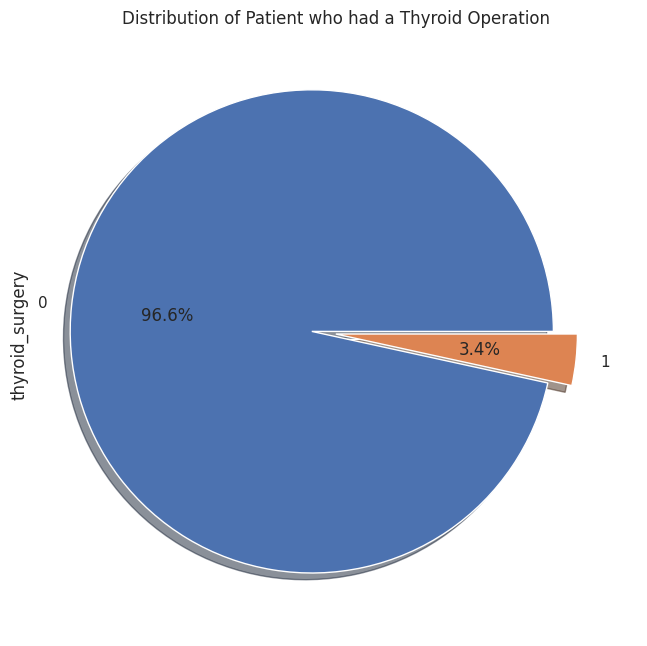

In [325]:
#Distribution of Patients who had Thyroid Surgery in our dataset
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.thyroid_surgery.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patient who had a Thyroid Operation');

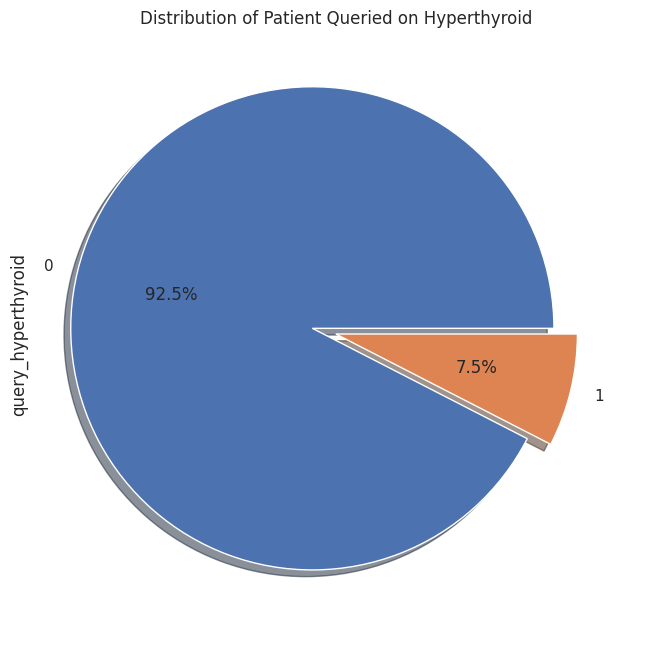

In [326]:
#Distribution of Patients who were Queried on Hyperthyroid
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.query_hyperthyroid.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patient Queried on Hyperthyroid');

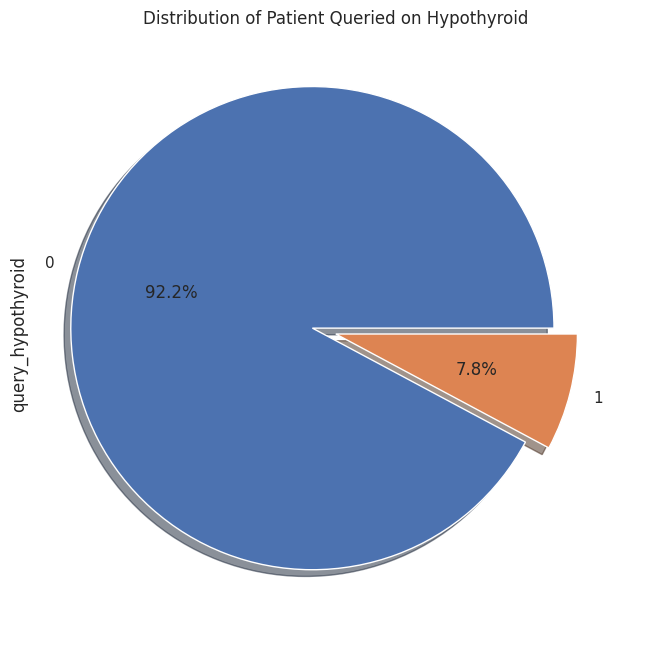

In [327]:
#Distribution of Patients who were Queried on Hypothyroid
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.query_hypothyroid.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patient Queried on Hypothyroid');

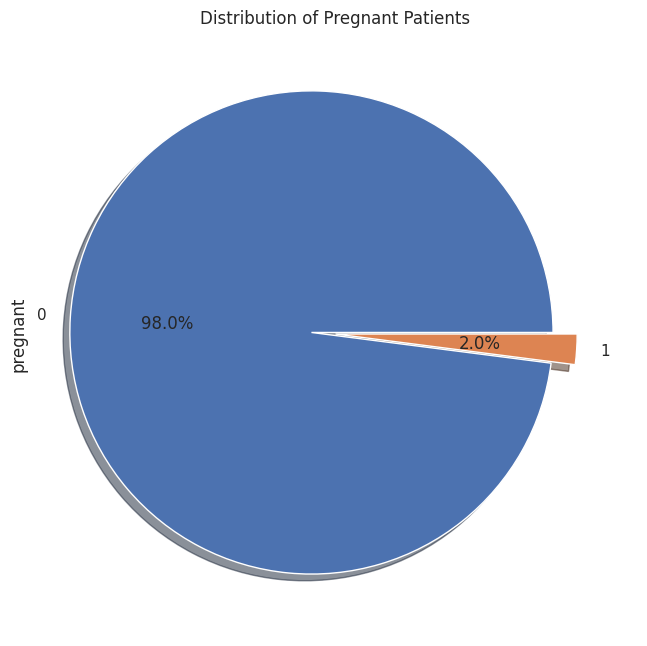

In [328]:
#Distribution of Patients who were Pregnant
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.pregnant.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Pregnant Patients');

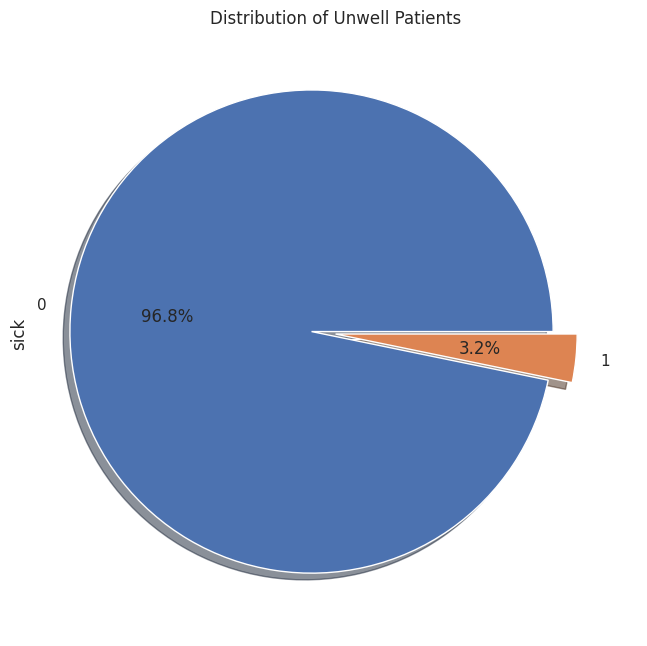

In [329]:
#Distribution of Patients who were Sick
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.sick.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Unwell Patients');

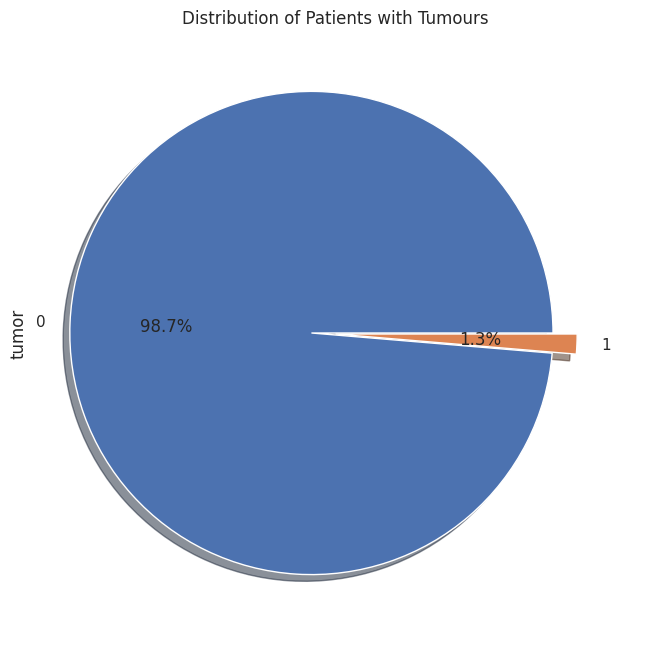

In [330]:
#Distribution of Patients with tumors
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.tumor.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patients with Tumours');

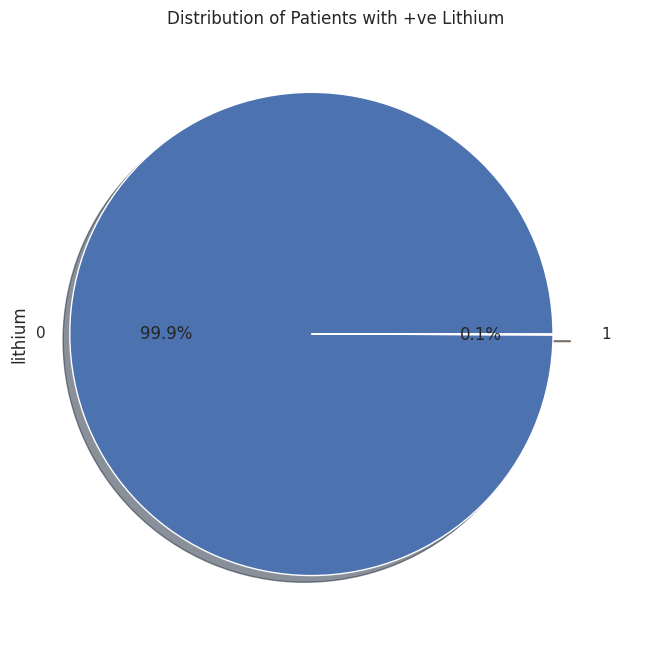

In [331]:
#Distribution of Patients with +ve Lithium return
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.lithium.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patients with +ve Lithium');

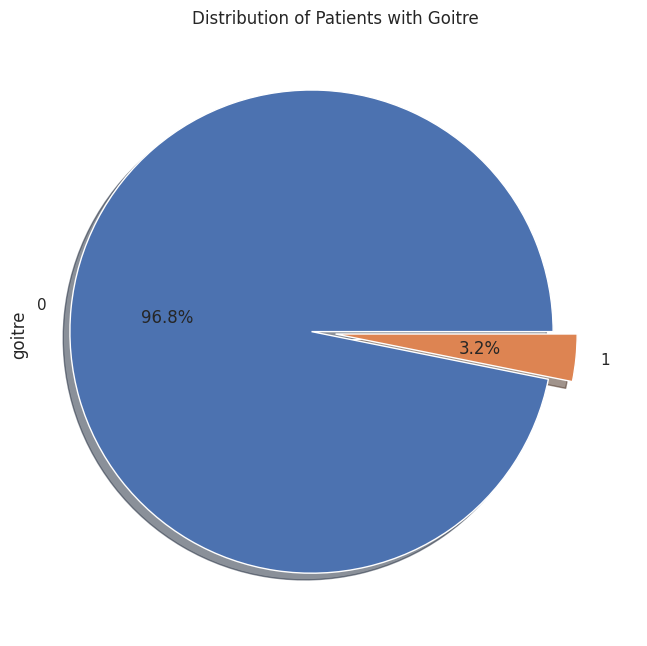

In [332]:
#Distribution of Patients with Goitre
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.goitre.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patients with Goitre');

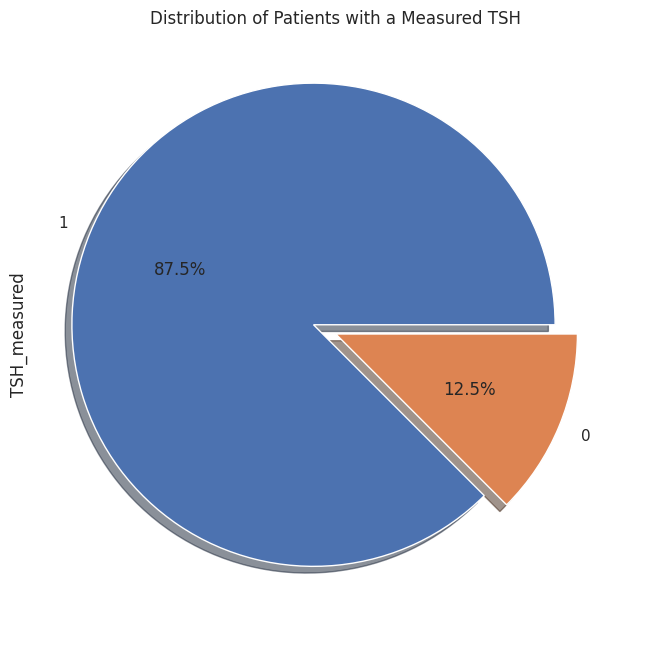

In [333]:
#Distribution of Patients whose TSH was measured
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.TSH_measured.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patients with a Measured TSH');

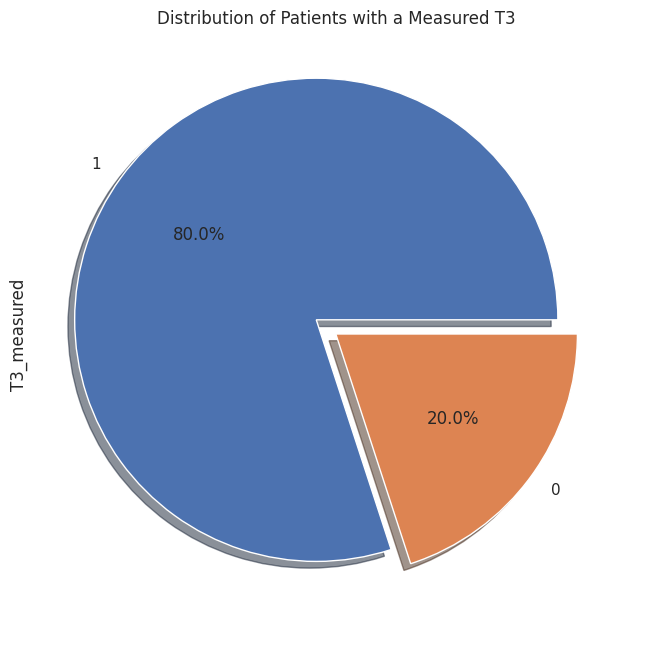

In [334]:
#Distribution of Patients whose T3 was measured
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.T3_measured.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patients with a Measured T3');

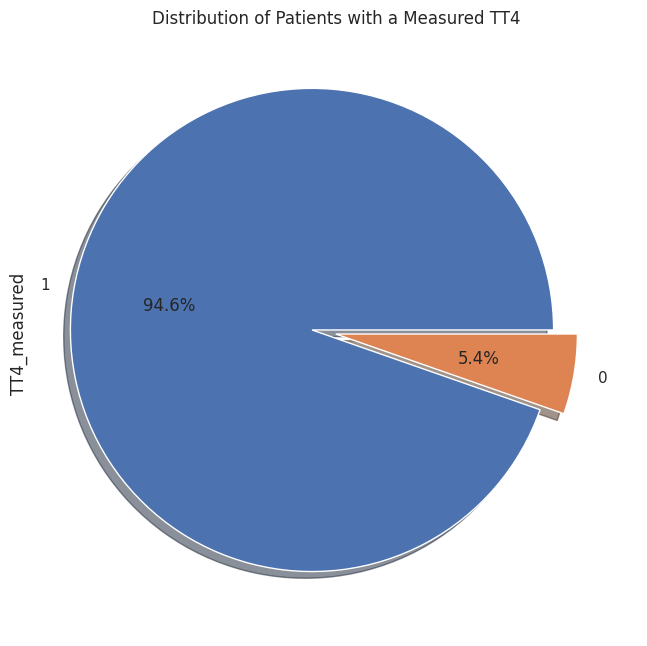

In [335]:
#Distribution of Patients whose TT4 was measured
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.TT4_measured.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patients with a Measured TT4');

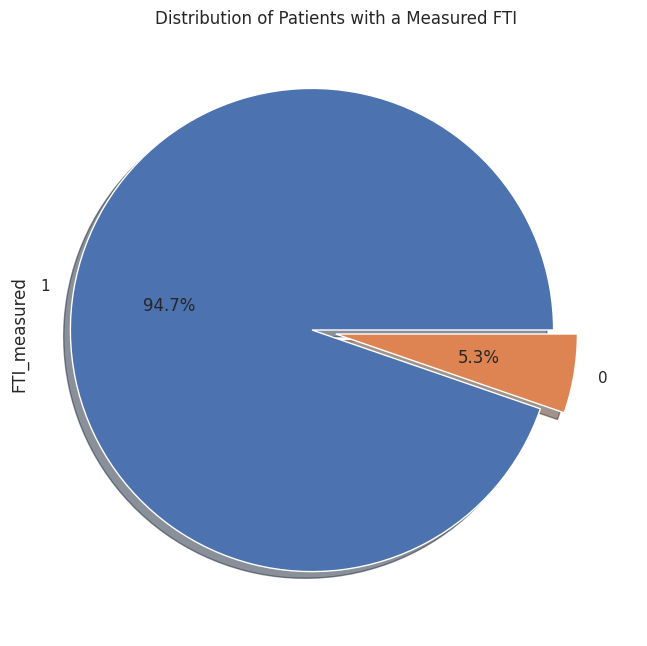

In [336]:
#Distribution of Patients whose FTI was measured
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.FTI_measured.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patients with a Measured FTI');

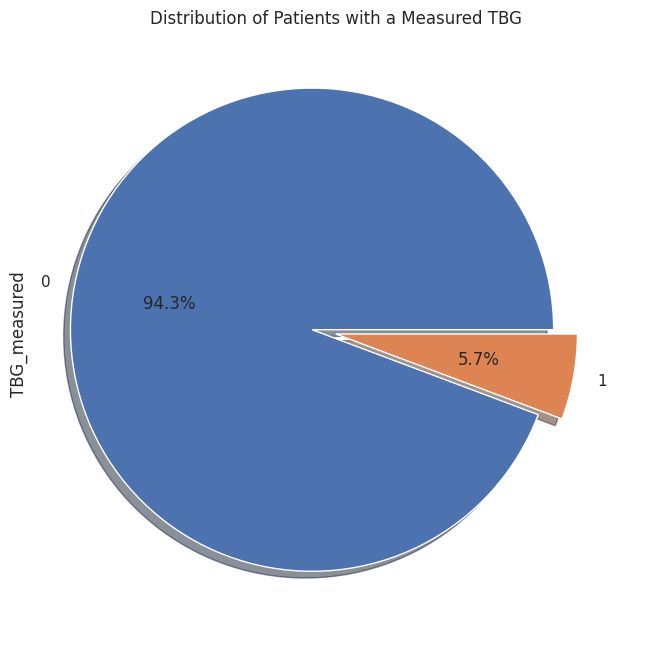

In [337]:
#Distribution of Patients whose TBG was measured
plt.figure(figsize=(10,8), dpi=100)
explode=(0.1,0)
df.TBG_measured.value_counts().plot(kind='pie', explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Patients with a Measured TBG');

In [338]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,hypothyroid,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,hypothyroid,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,hypothyroid,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,hypothyroid,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


In [339]:
#Empirical Cumulative Frequency Distribution plots are a powerful way of exploring
#whether our data follows a normal distribution without succumbing to binning bias
#prevalent in the use of Histograms

# Create a function for computing and plotting the ECDF with default parameters
def plot_ecdf(data,title = "Empirical CUmulative Distribution Function Plot", xlabel = 'Data Values', ylabel = 'Percentage'):
    
    """ 
    Function to plot ecdf taking a column of data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1, len(data)+1)/len(data)
    plt.plot(xaxis,yaxis,linestyle='none',marker='.')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0.02)

In [340]:
# Creating our Empirical Cumulative Frequency Distribution function
def ecdf(data):
    """ 
    This function creates the x and y axis for an ecdf
    plot given the data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data)+1)/len(data)
    return xaxis, yaxis

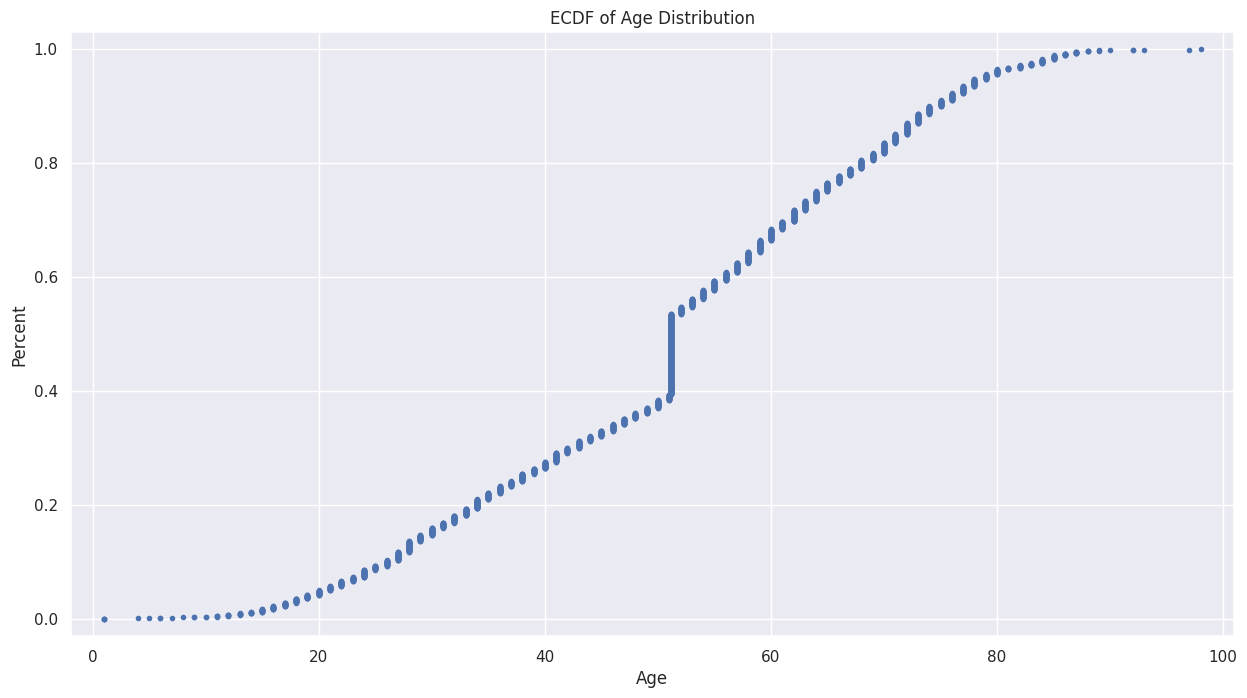

In [341]:
# Creating the xaxis and yaxis for our ecdf on age column
x,y = ecdf(df['age'])

# Plotting our ecdf
plt.figure(figsize=(15,8), dpi=100)
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Percent')
plt.margins(0.03);

In [342]:
#The age column doesn't quite follow a normal distribution.
#We can still pick age 51 as the mean age. 

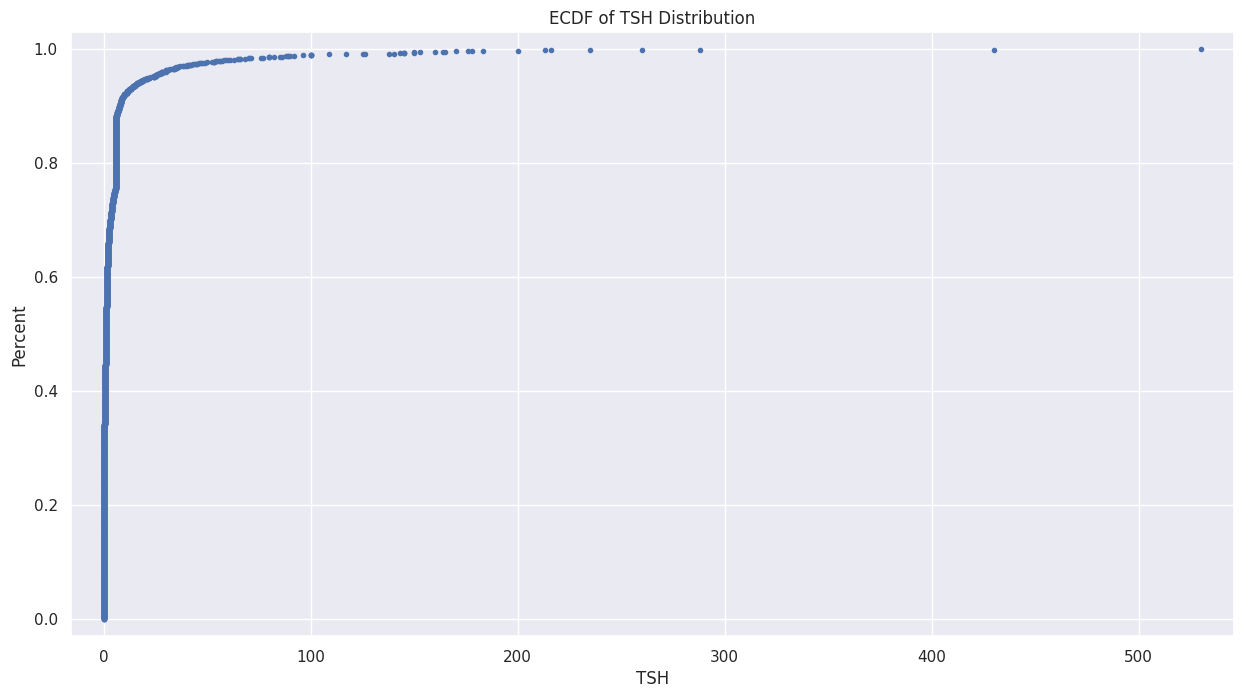

In [343]:
# Creating the xaxis and yaxis for our ecdf on TSH column
x,y = ecdf(df['TSH'])

# Plotting our ecdf
plt.figure(figsize=(15,8), dpi=100)
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of TSH Distribution')
plt.xlabel('TSH')
plt.ylabel('Percent')
plt.margins(0.03);

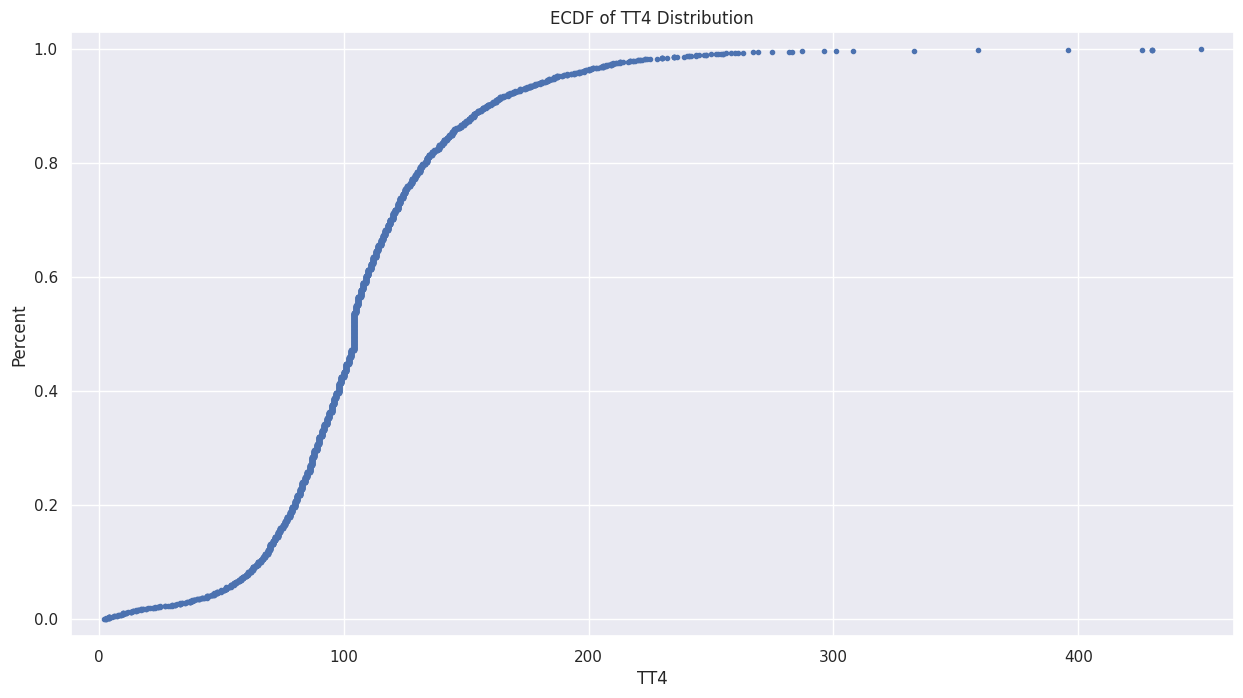

In [344]:
# Creating the xaxis and yaxis for our ecdf on TT4 column
x,y = ecdf(df['TT4'])

# Plotting our ecdf
plt.figure(figsize=(15,8), dpi=100)
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of TT4 Distribution')
plt.xlabel('TT4')
plt.ylabel('Percent')
plt.margins(0.03);

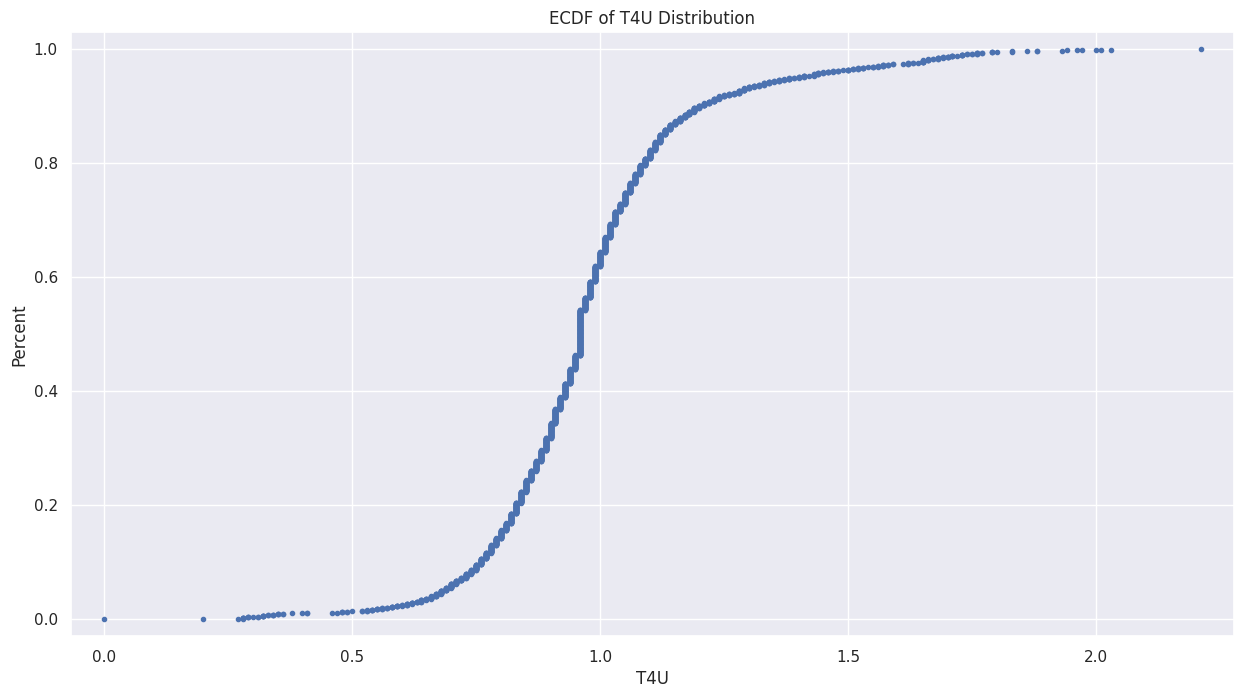

In [345]:
# Creating the xaxis and yaxis for our ecdf on T4U column
x,y = ecdf(df['T4U'])

# Plotting our ecdf
plt.figure(figsize=(15,8), dpi=100)
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of T4U Distribution')
plt.xlabel('T4U')
plt.ylabel('Percent')
plt.margins(0.03);

# Bivariate Analysis

In [346]:
#Crossplots of features in our dataset
#to help us compare our variables side by side to draw relationships
#sns.pairplot(data=df, hue='status', diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
 #            size= 4 );

In [347]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,hypothyroid,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,hypothyroid,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,hypothyroid,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,hypothyroid,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


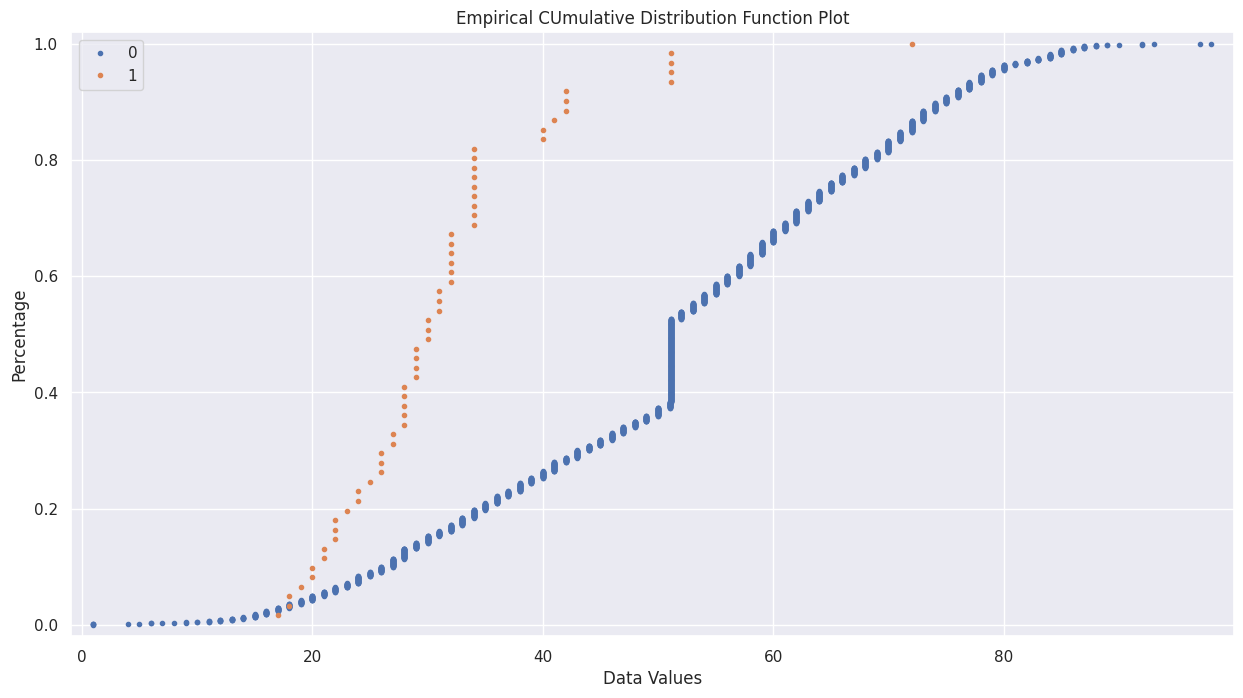

In [348]:
#ECDF of Age Vs Pregnant
pregnant= df.pregnant.unique()
plt.figure(figsize=(15,8), dpi=100)
plot_ecdf(df['age'][df.pregnant==0])
plot_ecdf(df['age'][df.pregnant==1])
plt.legend(labels=pregnant[::]);

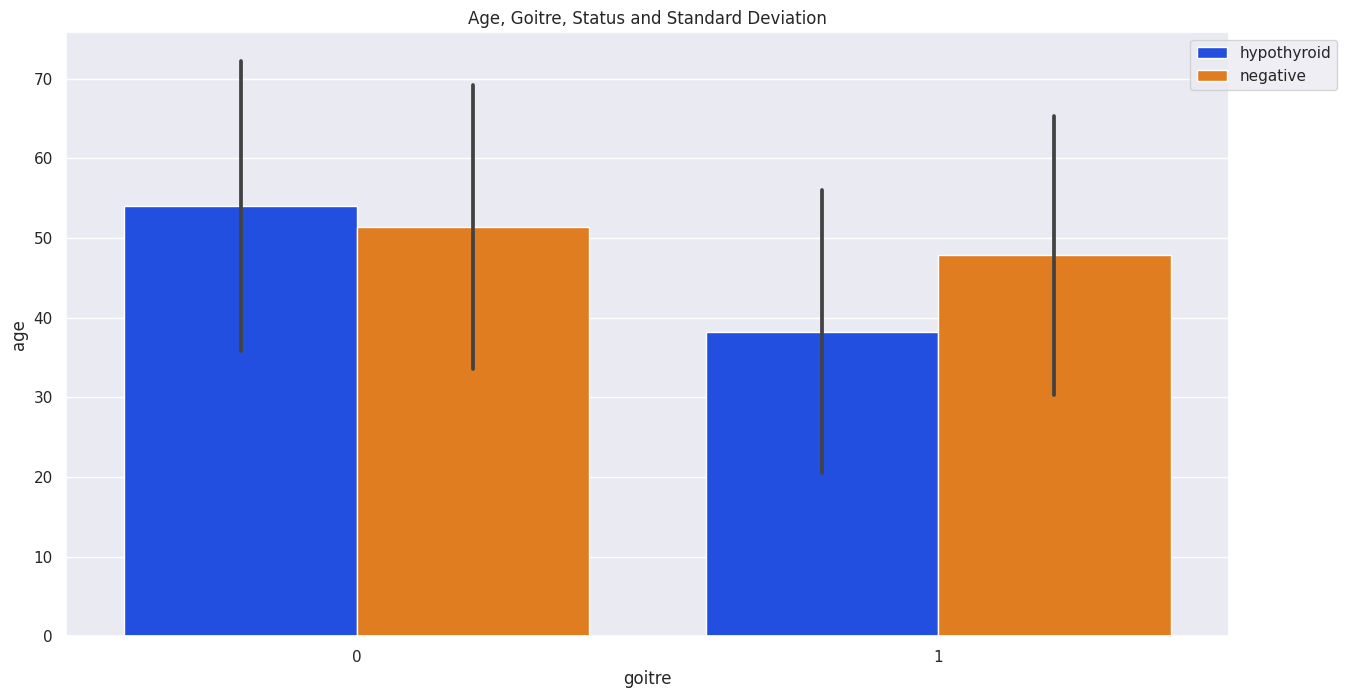

In [349]:
#Standard Deviation of Patients with Goitre and their Status
plt.figure(figsize=(15,8), dpi=100)
sns.barplot(data=df, x='goitre',y='age', estimator=np.mean, ci='sd', hue='status', palette='bright')
plt.legend(bbox_to_anchor= (1.1, 1))
plt.title('Age, Goitre, Status and Standard Deviation');


# **5. Model Development**


In this research, we are dealing with a classification problem. We have been provided with a dataset with around 20 independent variables and a dependent variable. We are required to build a model that would best predict what this dependent variable would be given a collection of new independent variables. 

In concrete terms, our model should predict whether a patient would return a negative or positive test for Hypothyroidism.

To achieve this goal, we will endevour to build and test the following models:
a) Random Forest
b) Adaptive Boost
c) Gradeient Boosting
d) Support Vector Machine

# **Random Forest**




In [350]:
#Defining Our Variables

df.head()

feature_n = (df.drop(['status'],axis=1)).columns

X = df.drop('status', axis=1)

y= df['status']

In [351]:
#Importing train_test_split to help split Our data
from sklearn.model_selection import train_test_split

#Splitting Our Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [352]:
#Leveraging GridSearchCV to determine the best parameters
from sklearn.model_selection import GridSearchCV

In [353]:
#Importing Random Forest
from sklearn.ensemble import RandomForestClassifier

In [354]:
#Specifying Our Parameters
n_estimators= [64, 100, 128, 200]
max_features= [2,6,10, 24]
bootstrap= [True, False]
oob_score =[True, False]

param_grid= {'n_estimators': n_estimators, 'max_features':max_features, 'bootstrap':bootstrap, 'oob_score': oob_score }

In [355]:
#Instantiating Random Forest Classifier
model = RandomForestClassifier()

In [356]:
#Instantiating GridSearchCV and passing in our RFC model and parameters
gridsv= GridSearchCV(model, param_grid)

In [357]:
#Fitting Our Grid to the training data
gridsv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [358]:
#Deriving Our best Params
gridsv.best_params_

{'bootstrap': True, 'max_features': 24, 'n_estimators': 64, 'oob_score': True}

In [359]:
#Training Our Model on the data
preds= gridsv.predict(X_test)

# **Model Performance Evaluation**

In [360]:
#Importing Our Model Performance Metrics

from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix, accuracy_score

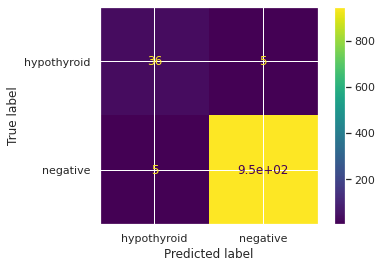

In [361]:
#Plotting the Confusion Matrix
plot_confusion_matrix(gridsv, X_test, y_test );

In [362]:
#Diplaying Our Classification Report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

 hypothyroid       0.88      0.88      0.88        41
    negative       0.99      0.99      0.99       952

    accuracy                           0.99       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.99      0.99      0.99       993



In [363]:
#Detrmining the Optimal Number of trees for Random Forest
errors = []
misclass = []


for n in range(1, 200):
  model= RandomForestClassifier(n_estimators=n, max_features=24)
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  err = 1 - accuracy_score(y_test, preds)
  no_misclass = np.sum(preds!= y_test )

  errors.append(err)
  misclass.append(no_misclass)

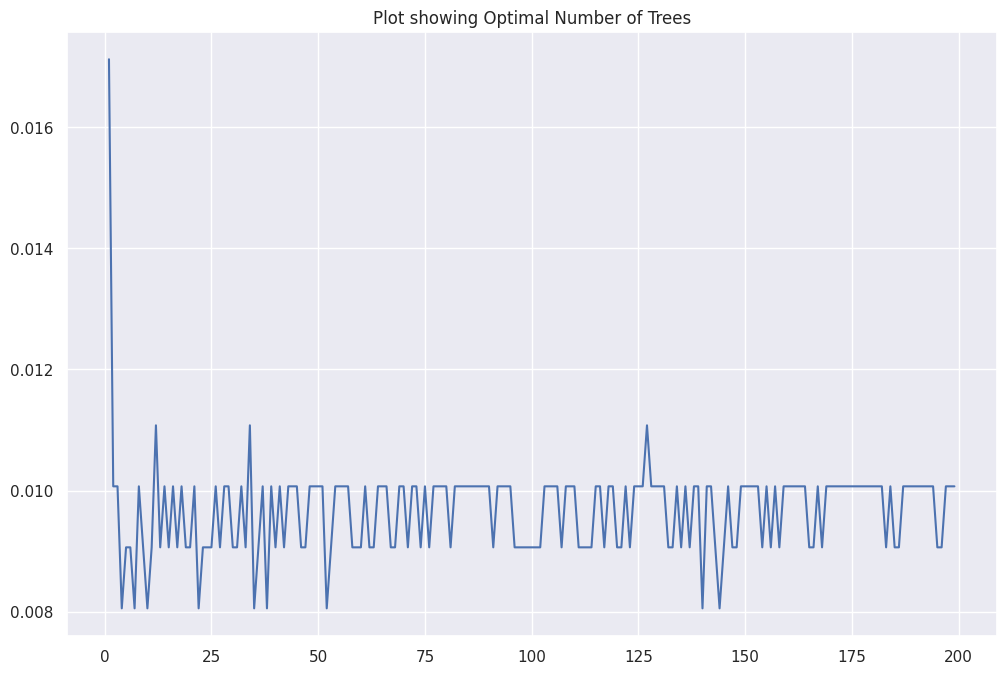

In [364]:
#Plot of Optimal Number of Trees
plt.figure(figsize=(12,8), dpi=100)
plt.plot(range(1,200), errors)
plt.title('Plot showing Optimal Number of Trees');

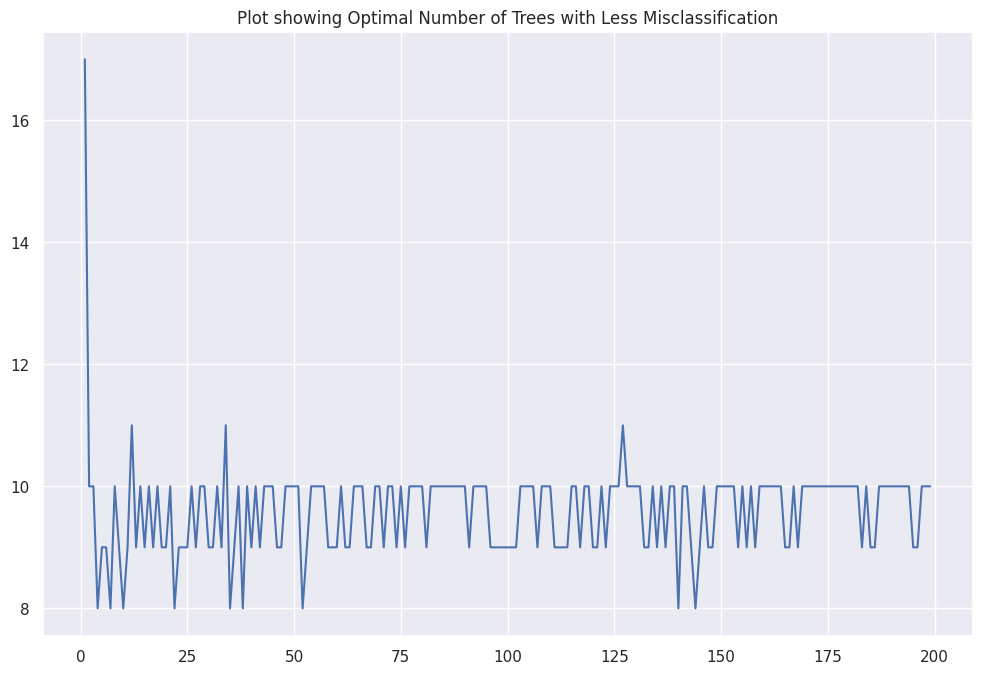

In [365]:
#Plot of Optimal Number of Trees Vs Misclassifcation
plt.figure(figsize=(12,8), dpi=100)
plt.plot(range(1,200), misclass)
plt.title('Plot showing Optimal Number of Trees with Less Misclassification');

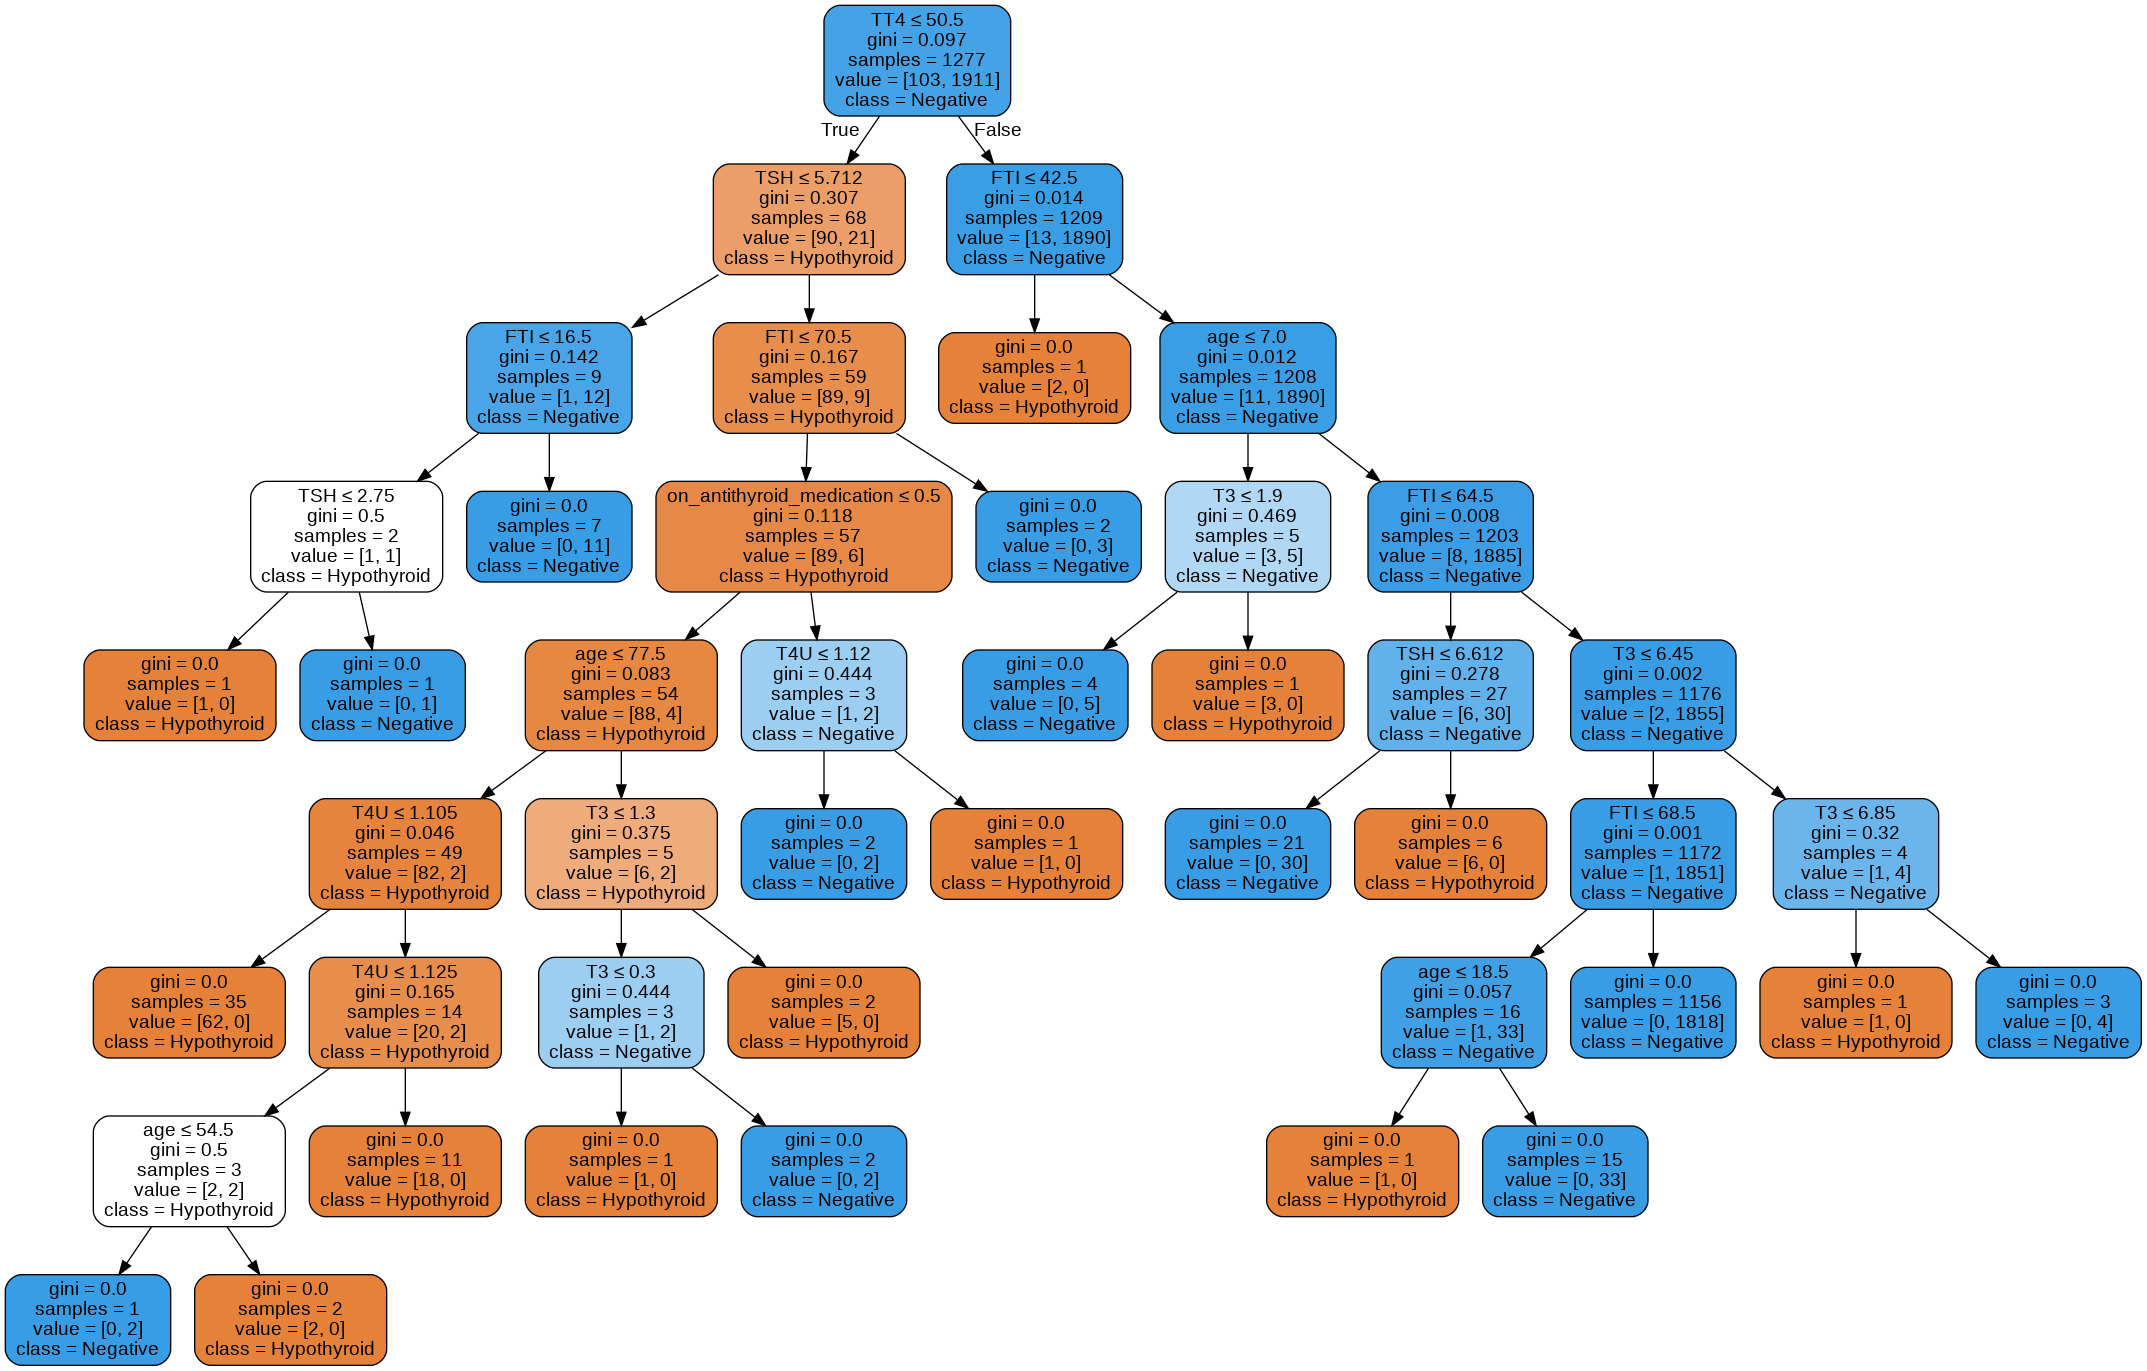

In [366]:
#Visualizing Our Tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = model.estimators_[115]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_n, class_names=['Hypothyroid', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypo_forest.png')
Image(graph.create_png())


# **Adaptive Boosting**

In [367]:
#Defining Our Variables

df.head()

X = df.drop('status', axis=1)

y= df['status']

In [368]:
#Splitting Our Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [369]:
#Getting Adaboost from Sklearn ensemble and building our model

from sklearn.ensemble import  AdaBoostClassifier

In [370]:
#Instantiating Our Model
#If we were fititing Our Model to One feature to split on, what feature would
#yield the best performance?

adab = AdaBoostClassifier(n_estimators=1)

In [371]:
#Fitting the Model

adab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1, random_state=None)

# **Model Evaluation**

In [372]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [373]:
#Apply model to Our test data and deriving Our Predictions

preds = adab.predict(X_test)

In [374]:
#Checking Our Results

#For a single stump, it is evident that our model does not
#yield great results

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

 hypothyroid       0.79      0.66      0.72        41
    negative       0.99      0.99      0.99       952

    accuracy                           0.98       993
   macro avg       0.89      0.83      0.85       993
weighted avg       0.98      0.98      0.98       993



In [375]:
#Checking what feature Our Model picked as the most important to split
adab.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0.])

In [376]:
#Deriving the index of our feature
adab.feature_importances_.argmax()

22

In [377]:
#We conclude that from our model, if one were to choose only one feature
#to determine whether a patient will be negative or hypothyroidic, then the
#Free Thyroxine Index (FTI) would be that feature. From an accuracy perspective
#this view os supported by the 98% accuracy in the Classifcation Report
X.columns[22]

'FTI'

In [378]:
len(X.columns)

24

In [379]:
#Above we've seen how model performs with one feature. We can test how model
#would perform given different features and derive the optimal one using a for 
#loop. A Grid Search could achoeve the same results but for simplicty we
#use a for loop
error_rates = []

for n in range(1, 25):
  adab = AdaBoostClassifier(n_estimators=n)
  adab.fit(X_train, y_train)
  preds = adab.predict(X_test)

  err = 1- accuracy_score(y_test, preds)

  error_rates.append(err)

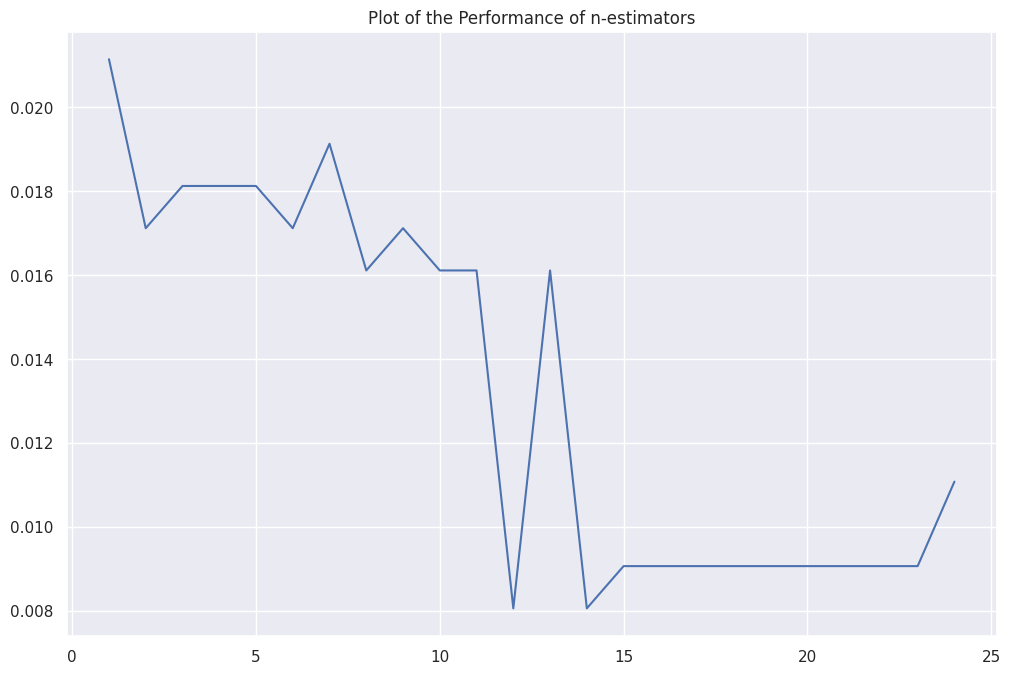

In [380]:
#A plot of our models performance would be instructive in determining the optimal
#number of our estimator.
plt.figure(figsize=(12,8), dpi=100)
plt.plot(range(1, 25), error_rates)
plt.title('Plot of the Performance of n-estimators');

In [381]:
#As we go through different models, there is high volatility in performance until
#we get to 15 estimators where we see stability before there is a spike at 24 
#estimators.

In [382]:
#How many estimators are we working with now? Our models would have the last
#loop we ran 

adab

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=24, random_state=None)

In [383]:
#With 24 estimators, the following would be our features and their importance
features = pd.DataFrame(index=X.columns, data=adab.feature_importances_, columns=['Importance'])
features

,Importance
age,0.083333
sex,0.000000
on_thyroxine,0.041667
query_on_thyroxine,0.000000
on_antithyroid_medication,0.041667
thyroid_surgery,0.041667
query_hypothyroid,0.000000
query_hyperthyroid,0.000000
pregnant,0.000000
sick,0.000000


In [384]:
#What is the model Considering?
only_imp_features= features[features['Importance']>0]
only_imp_features

,Importance
age,0.083333
on_thyroxine,0.041667
on_antithyroid_medication,0.041667
thyroid_surgery,0.041667
TSH,0.166667
T3,0.041667
TT4,0.166667
T4U,0.041667
FTI,0.375000


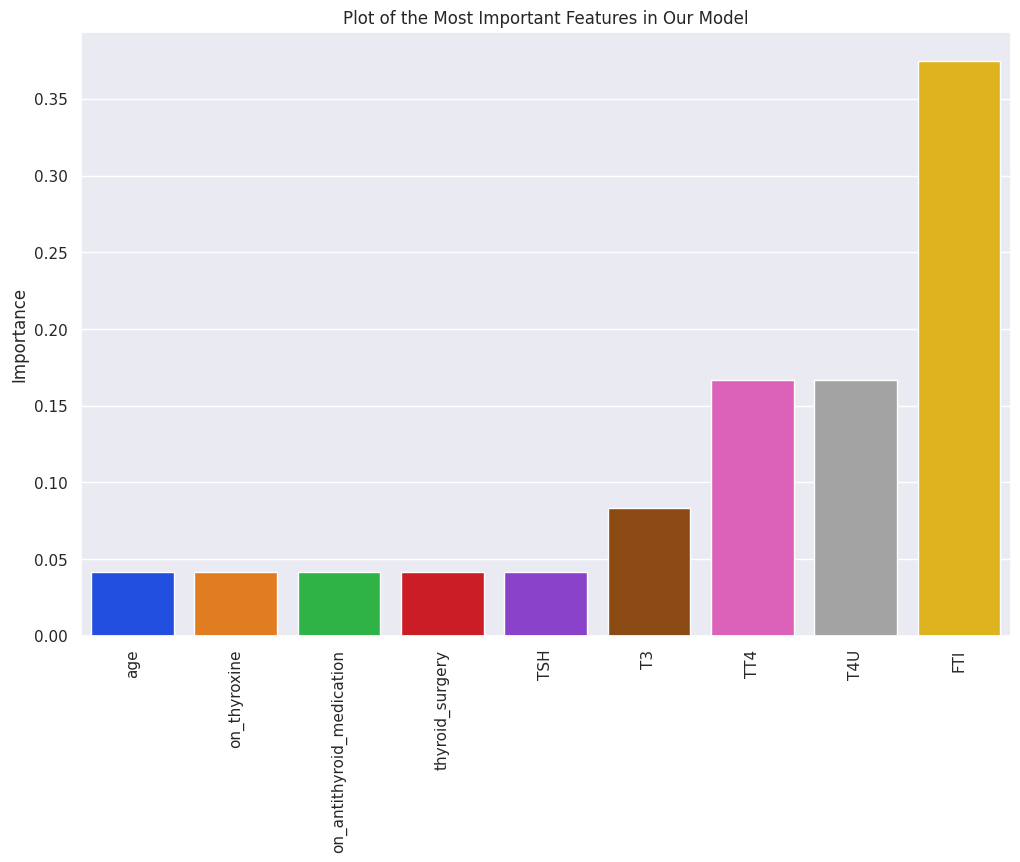

In [385]:
#Visualizing the Most important feature at n_estimators=24
plt.figure(figsize=(12,8), dpi=100)
sns.barplot(data=only_imp_features.sort_values('Importance'), x=only_imp_features.index, y='Importance', palette='bright')
plt.xticks(rotation=90)
plt.title('Plot of the Most Important Features in Our Model');

In [386]:
#Checking Our Results
#We achieve better results with 24 estimators
#Our accuracy Score has gone up by 1%

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

 hypothyroid       0.92      0.80      0.86        41
    negative       0.99      1.00      0.99       952

    accuracy                           0.99       993
   macro avg       0.95      0.90      0.93       993
weighted avg       0.99      0.99      0.99       993



In [387]:
#Let's Compare what Our results would be at 19 estimators as from the for loop,
#we saw Our model begin to stabilise from 15 to 23 thereabouts.
adab = AdaBoostClassifier(n_estimators=19)
adab.fit(X_train, y_train)
preds = adab.predict(X_test)

In [388]:
#Checking Our Results
#We achieve better results with 19 estimators
#

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

 hypothyroid       0.90      0.88      0.89        41
    negative       0.99      1.00      1.00       952

    accuracy                           0.99       993
   macro avg       0.95      0.94      0.94       993
weighted avg       0.99      0.99      0.99       993



# **Gradient Boosting**

In [389]:
#Defining Our Variables

df.head()

X = df.drop('status', axis=1)

y= df['status']

In [390]:
#Importing Train Test Split from Sklearn
from sklearn.model_selection import train_test_split


In [391]:
#Splitting Our Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [392]:
#Importing Gradient Boost from SkLearn
from sklearn.ensemble import GradientBoostingClassifier

In [393]:
#We need GridSearch for hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

In [394]:
#Specifying Our Parameters
param_grid = {'n_estimators': [20, 100], 'learning_rate':[0.1, 0.05, 0.2], 'max_depth': [3,4,5]}

In [395]:
#Instantiating Our Model
gb = GradientBoostingClassifier()

In [396]:
#Fitting Our model to the Search Grid
grid = GridSearchCV(gb, param_grid)

In [397]:
#Training Our Model
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

# **Model Evaluation**

In [398]:
#Importance Our Performance measurement metrics
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

In [399]:
#Fitting Our Model to the test data
preds = grid.predict(X_test)

In [400]:
preds

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'hypothyroid', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'hypothyroid', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'hypothyroid', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'hypothyroid', 'negative',
       'negative', 'negative', 'negative', 'negati

In [401]:
#Checking waht our best estimators are
grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [402]:
#Our Best params are displayed below
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 20}

In [403]:
#Displaying Our Model's results
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

 hypothyroid       0.90      0.90      0.90        41
    negative       1.00      1.00      1.00       952

    accuracy                           0.99       993
   macro avg       0.95      0.95      0.95       993
weighted avg       0.99      0.99      0.99       993



In [404]:
#Deriving the significant features
grid.best_estimator_.feature_importances_

array([0.00266393, 0.        , 0.        , 0.        , 0.01804615,
       0.00336468, 0.00463437, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.21067796,
       0.        , 0.00373298, 0.        , 0.        , 0.        ,
       0.00474255, 0.        , 0.75213739, 0.        ])

In [405]:
feat_imprt = grid.best_estimator_.feature_importances_

In [406]:
#Creating a dataframe with the most important features
important_feat = pd.DataFrame(index=X.columns, data = feat_imprt, columns=['Importance'])

important_feat

,Importance
age,0.002664
sex,0.000000
on_thyroxine,0.000000
query_on_thyroxine,0.000000
on_antithyroid_medication,0.018046
thyroid_surgery,0.003365
query_hypothyroid,0.004634
query_hyperthyroid,0.000000
pregnant,0.000000
sick,0.000000


In [407]:
#Deriving the most significant Features
important_feat = important_feat[important_feat['Importance']> 0.00]


important_feat=important_feat.sort_values('Importance')

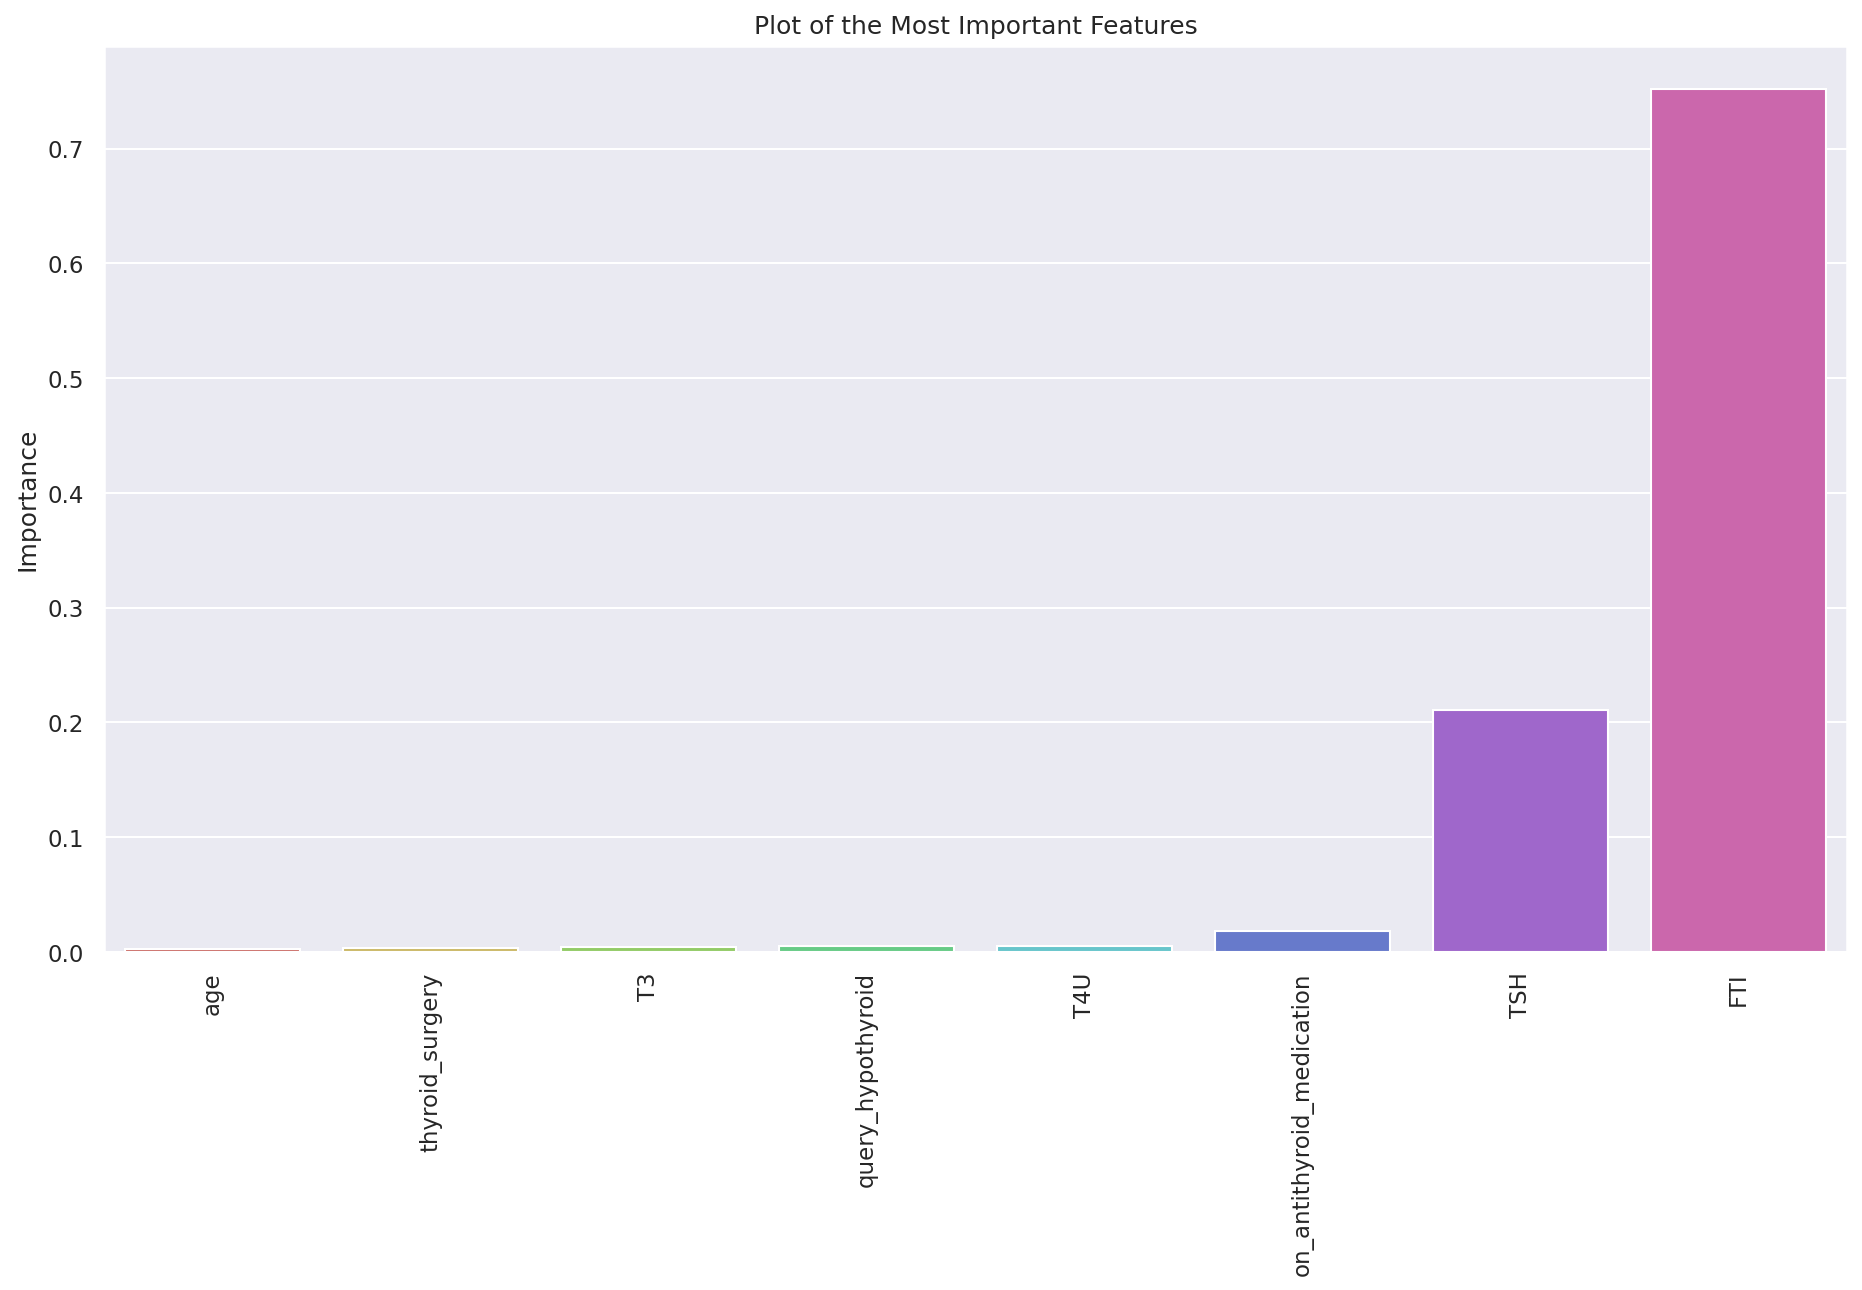

In [408]:
##Plotting distribution of most important features 
plt.figure(figsize=(15, 8), dpi=150)
sns.barplot(data=important_feat, x=important_feat.index, y='Importance', palette='hls')
plt.xticks(rotation=90)
plt.title('Plot of the Most Important Features');

In [409]:
#help(train_test_split)

# **Support Vector Machines (SVM)**

For this section, we are required to use the most important features in our dataset. We will therefore refer to the selected features from pur tree analysis.

# Feature Engineering & Selection

In [410]:
#Feature engineering to 
df.replace({"hypothyroid":1,"negative":0, }, inplace=True)

In [411]:
#Create a new dataset with our the most important features
new_df= df[['status','TSH', 'FTI', 'age', 'query_hypothyroid', 'T3', 'thyroid_surgery', 'on_antithyroid_medication']]

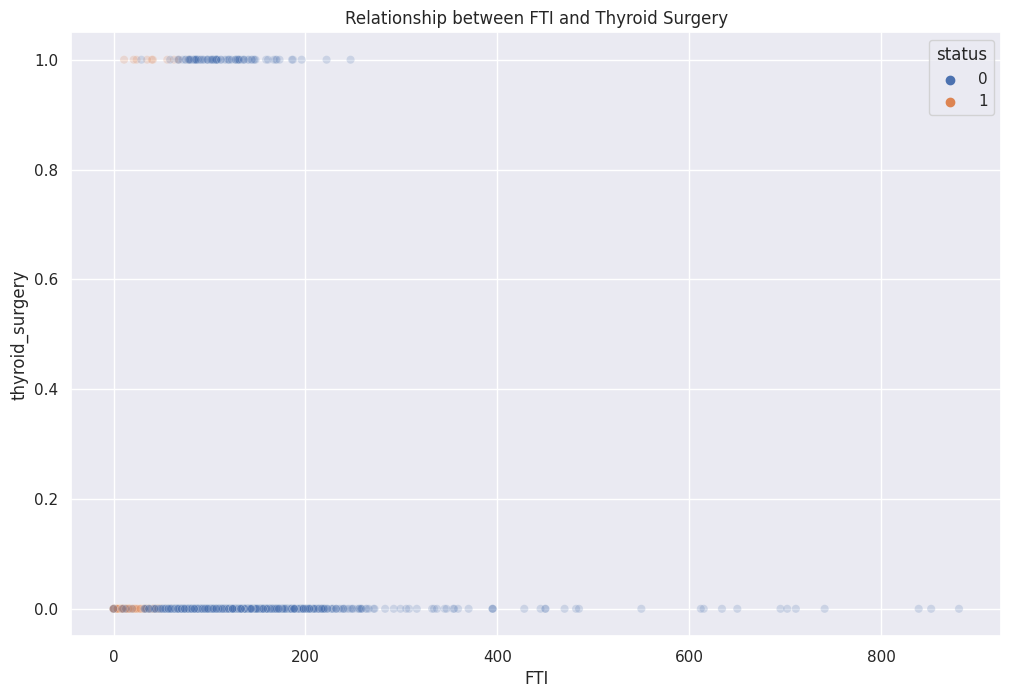

In [412]:
#Visualizing Our new dataset
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='FTI', y='thyroid_surgery', hue='status', alpha=0.2, data=new_df)
plt.title('Relationship between FTI and Thyroid Surgery');

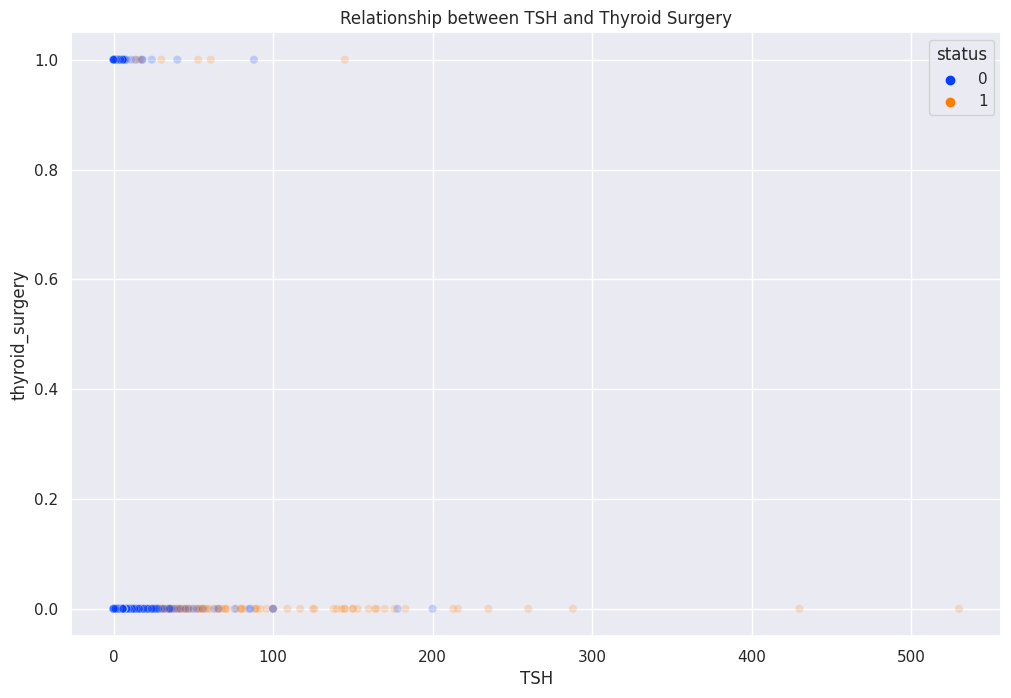

In [413]:
#Visualizing Our new dataset
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='TSH', y='thyroid_surgery', hue='status', alpha=0.2, data=new_df, palette='bright')
plt.title('Relationship between TSH and Thyroid Surgery');

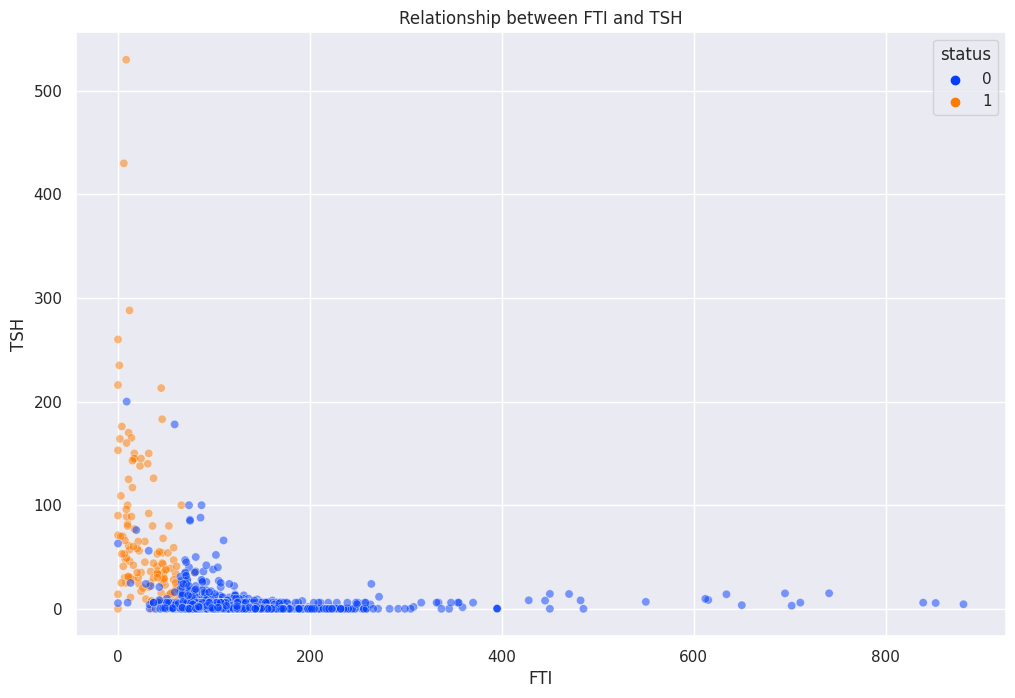

In [414]:
#Visualizing the most imprtant features in our dataset
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='FTI', y='TSH', hue='status', alpha=0.5, data=new_df, palette='bright')
plt.title('Relationship between FTI and TSH');

Building a model with FTI Vs TSH makes more sense going with the results we get from our plots. 

# **1. Linear Model**

In [415]:
#Given the Outliers in our dataset, standardization will be crucial
#to ensure all the features are treated the same.

#We will first do some data preprocessing

#Create a new dataset with our the most important features
new_df= df[['status','TSH', 'FTI']]

#Create and define our Independent variables
X= new_df.drop('status', axis=1)

#Our Dependent Variable
y= new_df['status']

In [416]:
#Splitting Our data before scaling
#Importing Train_Test_Split method from Sklearn
from sklearn.model_selection import train_test_split

#Splitting Our Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [417]:
#We need to standardize our data to before working with SVM.
#We have outliers in our dataset and would like ensure the model
#looks at all the values the same. 
#To do this we leverage SK Learn 

from sklearn.preprocessing import StandardScaler

#Instantiaitng Our Scaler

scaler = StandardScaler()

#Fitting X_train to the scaler

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [418]:
#Transforming Our Data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [419]:
from sklearn.svm import SVC

In [420]:
#Instantiating Our Model
#Starting with a C value of 1000. NB under SKlearn, this is the inverse of
#actual C
model_ln = SVC(kernel='linear', C=1000)

#Training Our Model
model_ln.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

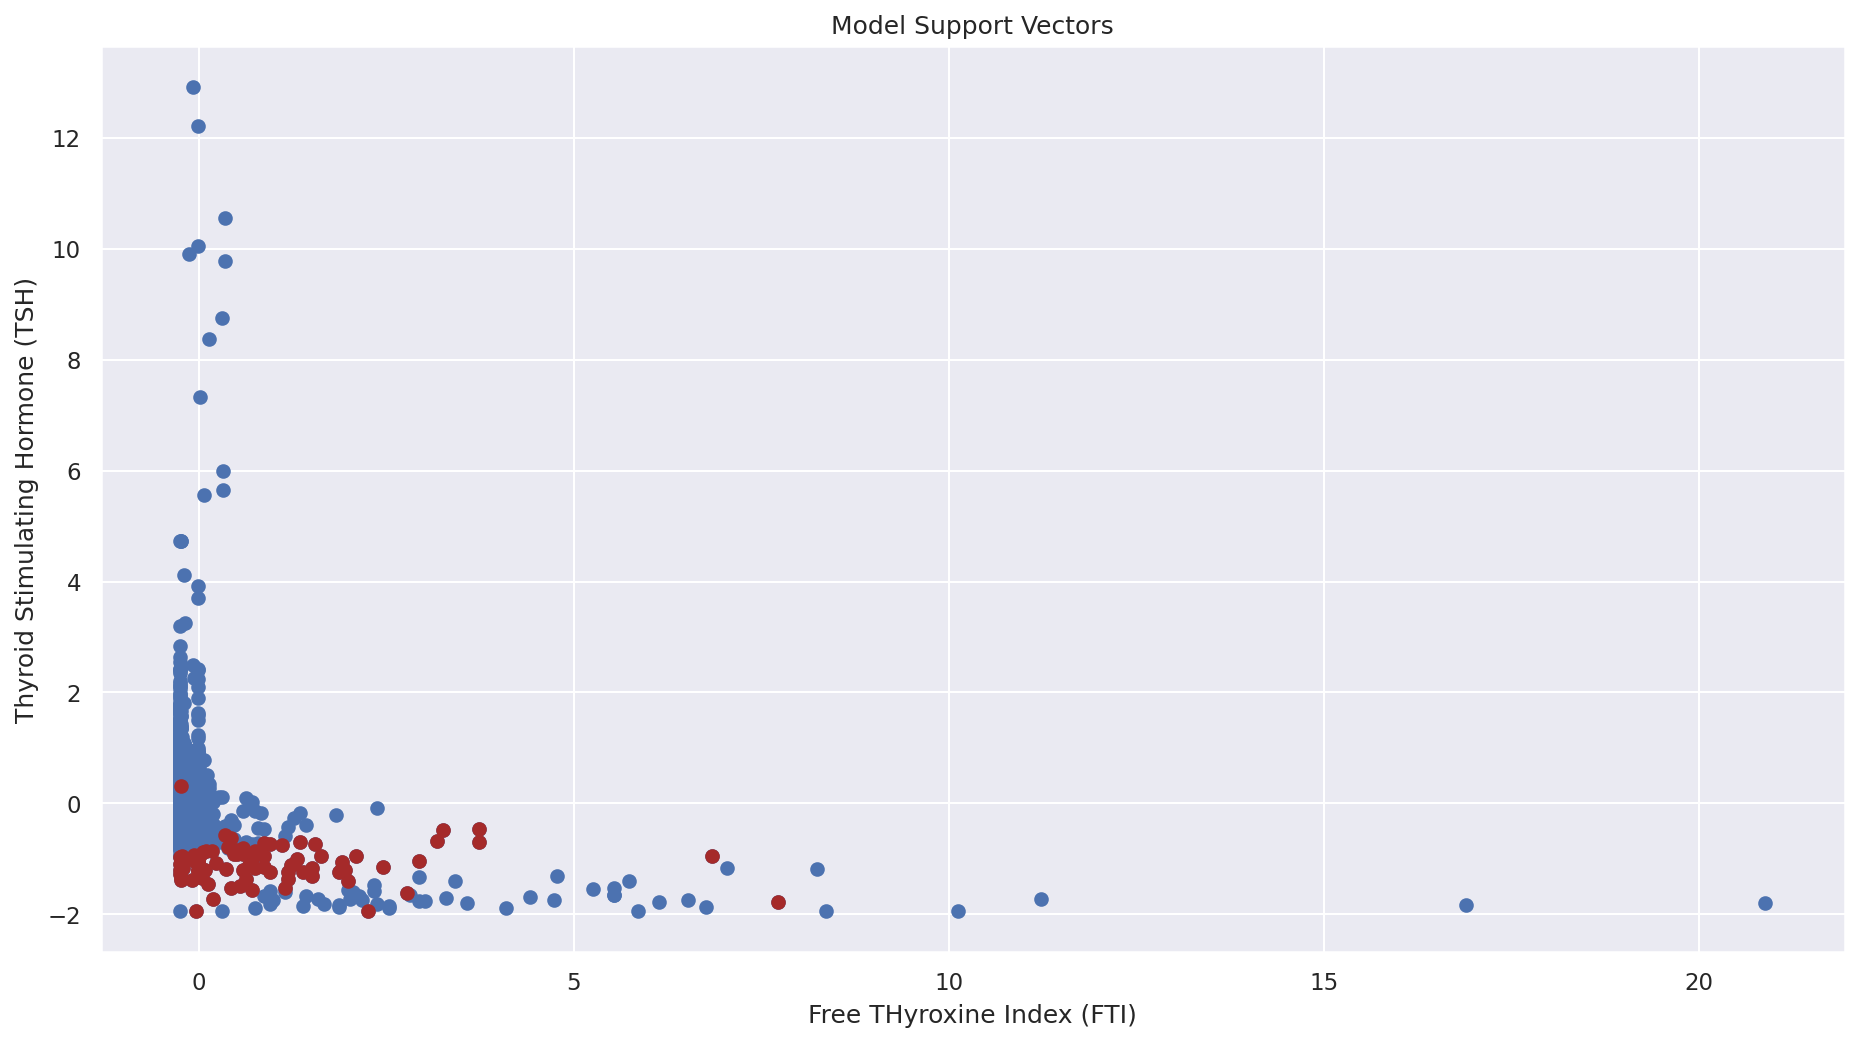

In [421]:
s_vectors = model_ln.support_vectors_


# Visualizing Our Model support vectors
#We do not expect substantial deviations from our initial plot
#as this is basically train data
plt.figure(figsize=(15, 8), dpi=150)
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(s_vectors[:,0], s_vectors[:,1], color='brown')
plt.xlabel('Free THyroxine Index (FTI)')
plt.ylabel('Thyroid Stimulating Hormone (TSH)')
plt.title('Model Support Vectors');


In [422]:
#Applying Our model to test data for predictions
preds = model_ln.predict(X_test)

# **Model Performance Evaluation**

In [423]:
#Deriving the Accuracy Scores

print(accuracy_score(y_test, preds))

0.9808660624370594


# Decision Boundary Visualization

In [ ]:
#Instantiating Our Model
#Starting with a C value of 1000. NB under SKlearn, this is the inverse of
#actual C
model_ln = SVC(kernel='linear', C=1000)

#Training Our Model
model_ln.fit(X, y)

In [441]:
#We will leverage Scikit Learn Capabilities in plotting our hyperplane.
#We use the default code available here: https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html


def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.figure(figsize=(12, 8), dpi=150)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')
    plt.title('Our Decision Boundary')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k');
  

In [438]:
#Deriving the function
from svm_margin_plot import plot_svm_boundary

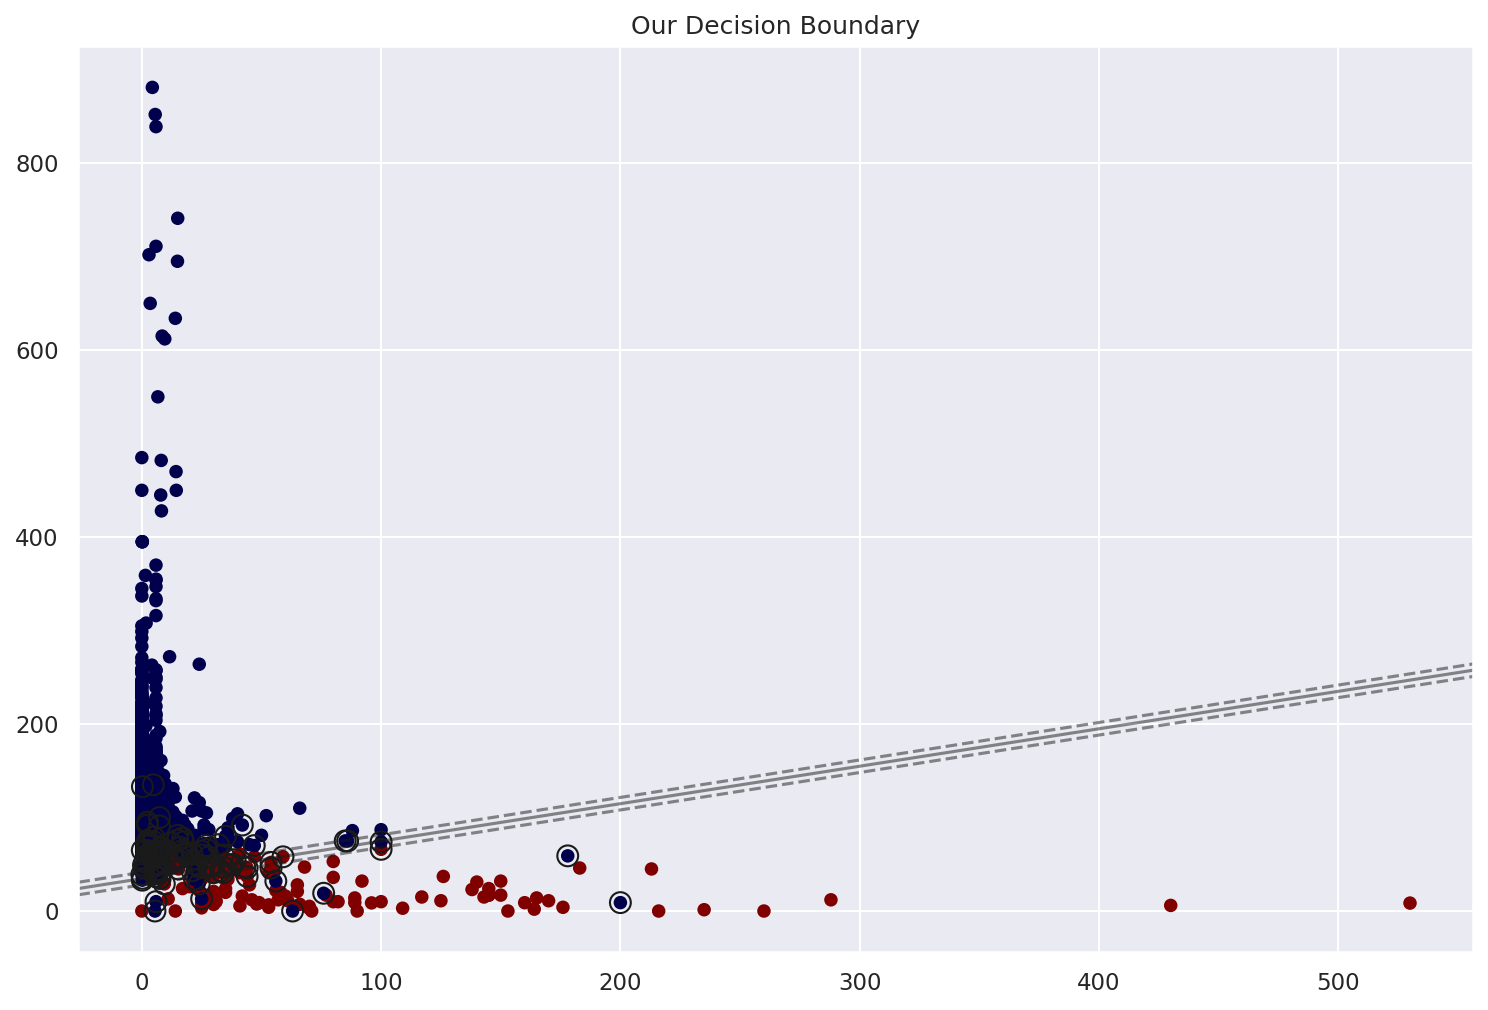

In [451]:
#Passing Our model with a C value of 1000 and other default parameters together
#with our Xand y values. 
plot_svm_boundary(model_ln, X, y)

In [435]:
#Although we have a very high accuracy score, it is evident from the 
#visualization that this may not be the best model or we need to 
#adjust our parameters further.

In [452]:
#Allowing more points by tuning the C parameter
model_ln = SVC(kernel='linear', C=0.05)
model_ln.fit(X, y)

SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

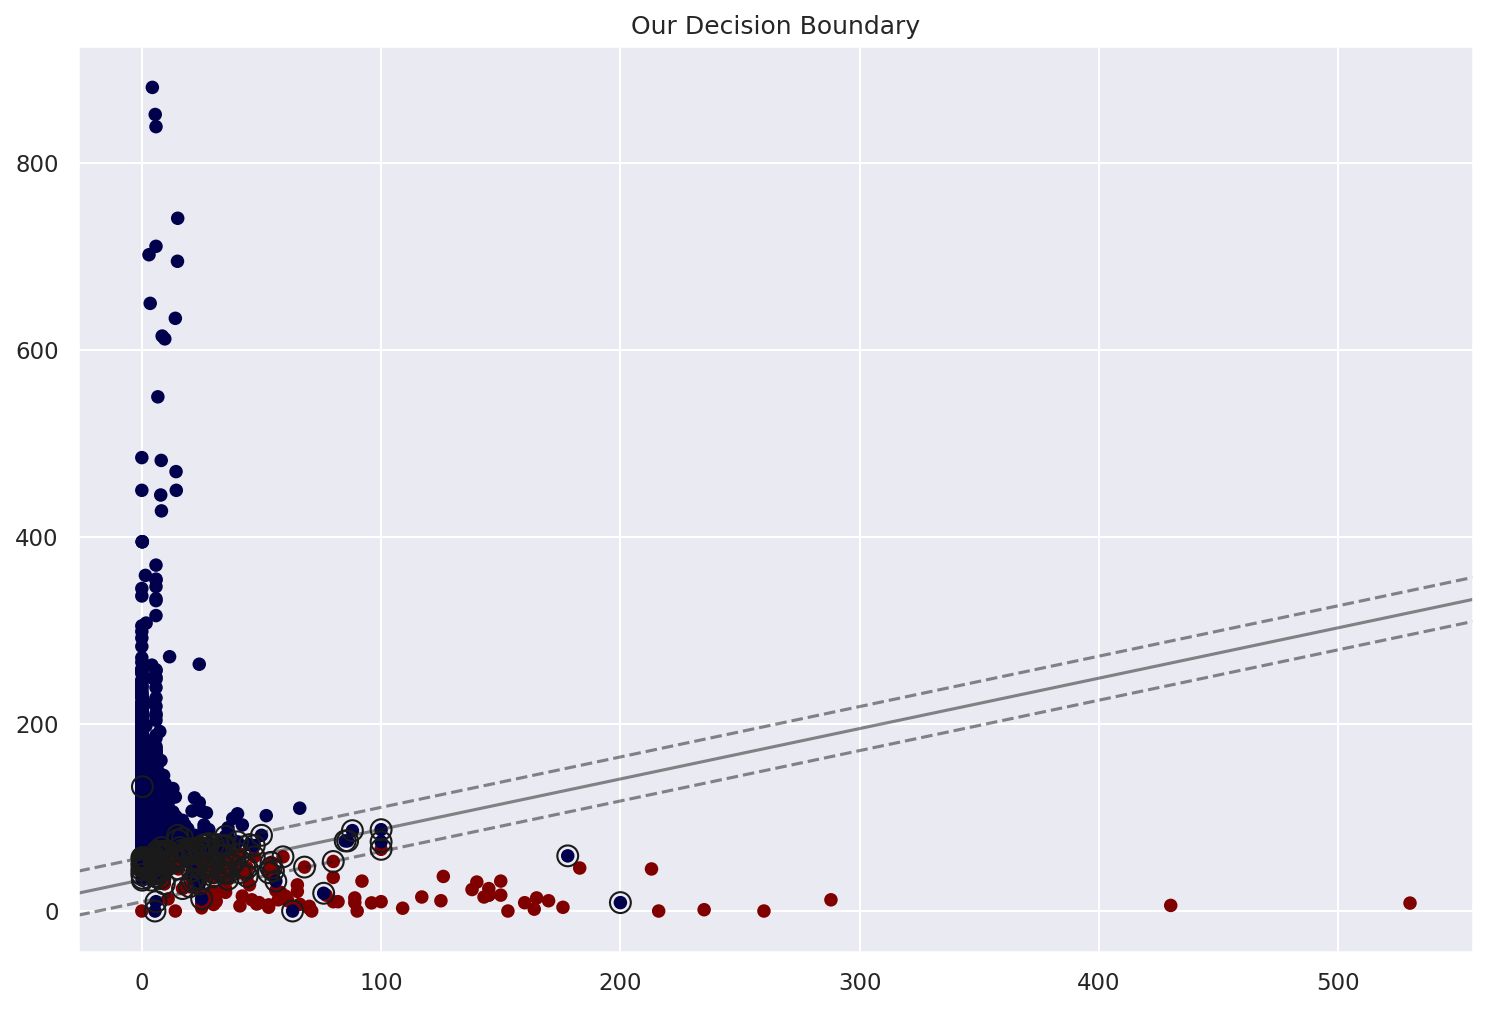

In [444]:
plot_svm_boundary(model_ln, X, y)

In [430]:
#With a C=0.05, our model performs much better meaning the more points we 
#allow, the better it gets. In this case we provide an allowance of 20 i,e inverse
# of 0.05. However, we do not have a good separation between negative and positive
#meaning we need to explore other models

# **2. Radio Basis Function (RBF)**

In [447]:
#Applying the higher dimension feature space model
#Instantiating Our Model and fitting it
model_rbf = SVC(kernel='rbf', C=1)

model_rbf.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

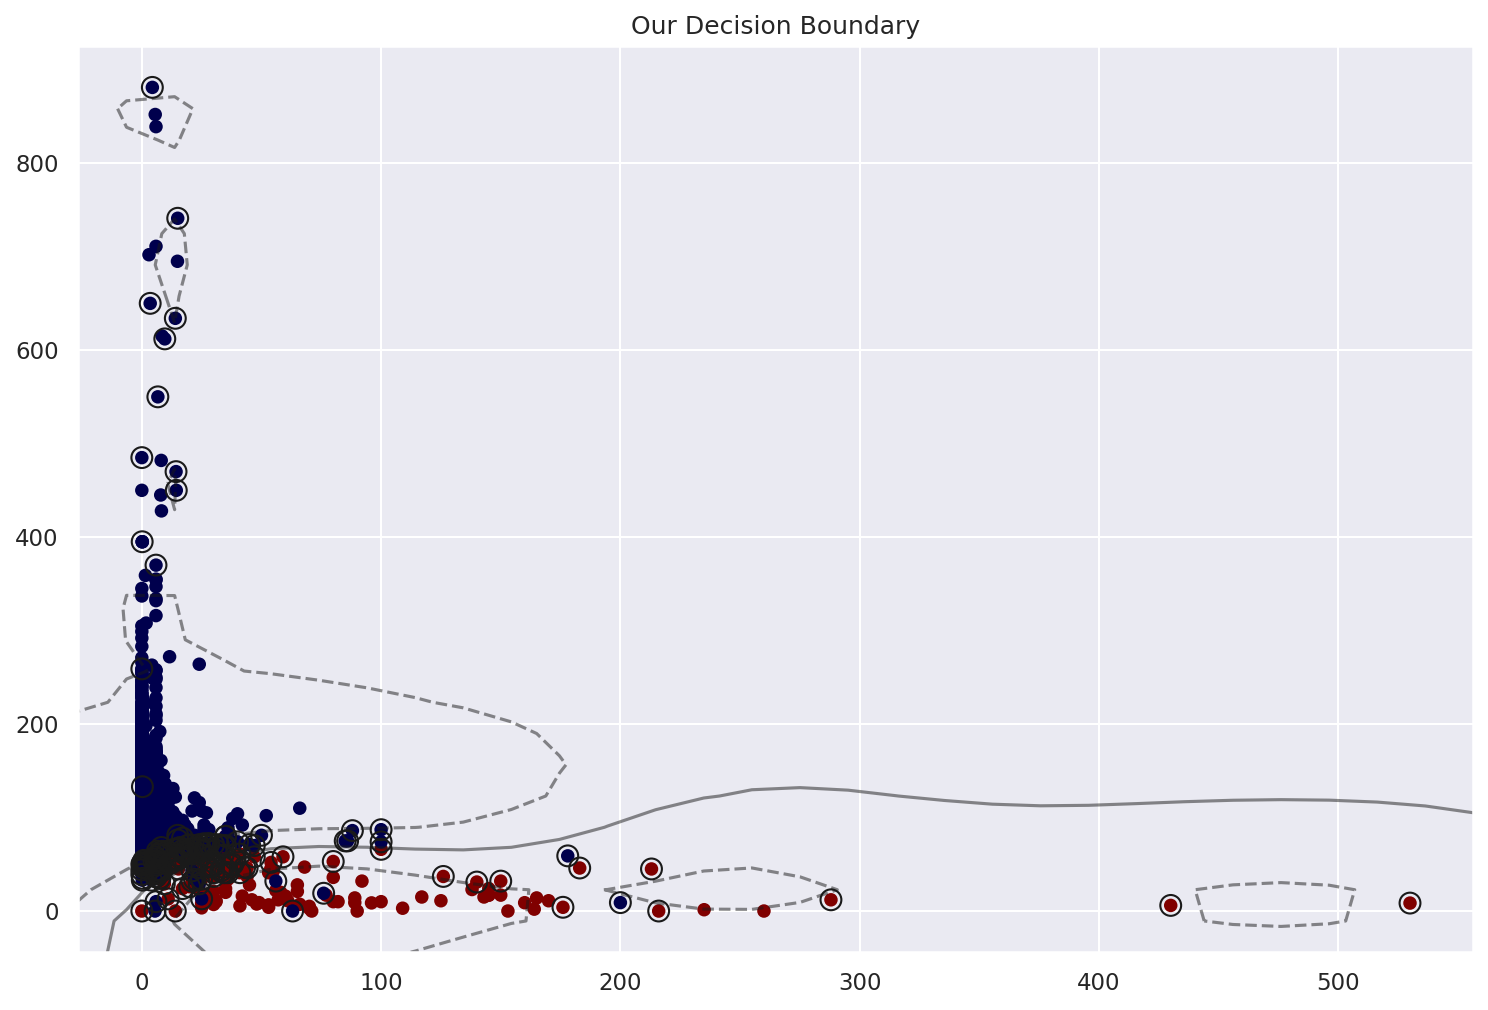

In [449]:
#Calling Our Plot function
plot_svm_boundary(model_rbf, X, y)

Although the boundaries between the Negative and Positive results are clearly formed, our model doesn't seem to perform well. There is a clear case of over-fitting the data as the decision boundary shows. Perhaps adjusting the parameters will help things. 

In [ ]:
#What if we allowed even less points? Say only 0.01 in the model? Comparing with
#a gamma of 0.01 i.e changing from its o.5 default

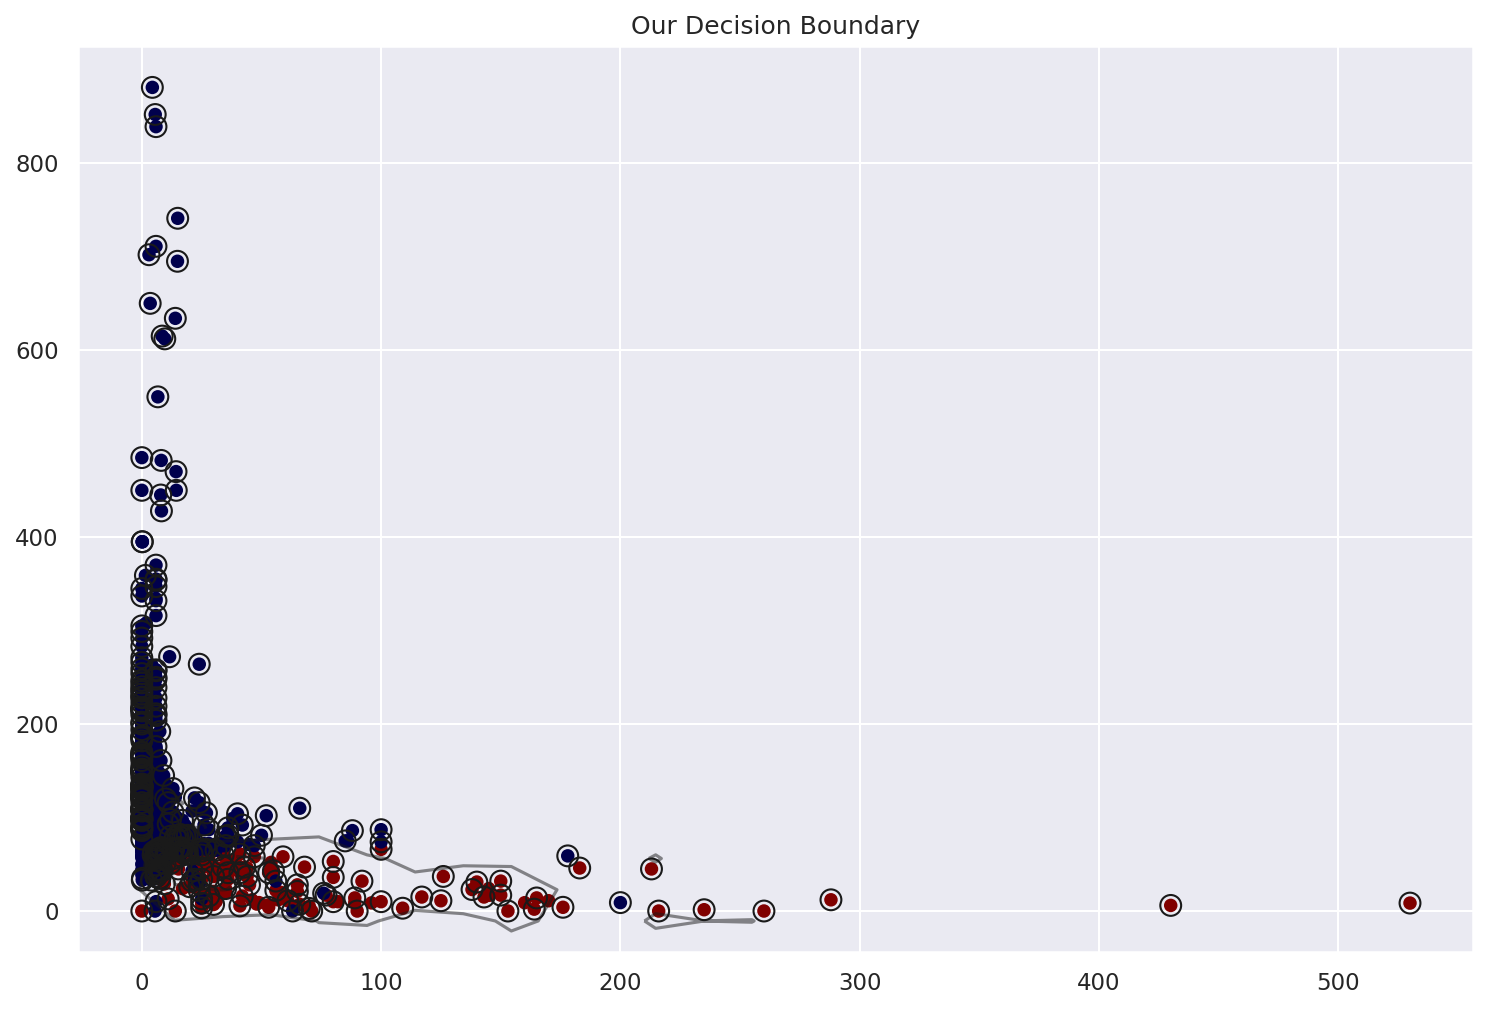

In [461]:
#Instantiating Our Model
model_rbf = SVC(kernel='rbf', C=100, gamma= 0.01)

#Fitting
model_rbf.fit(X, y)

#Calling Our Plot function
plot_svm_boundary(model_rbf, X, y)

Our model is overfitting anc capturing a lot of noise in the data

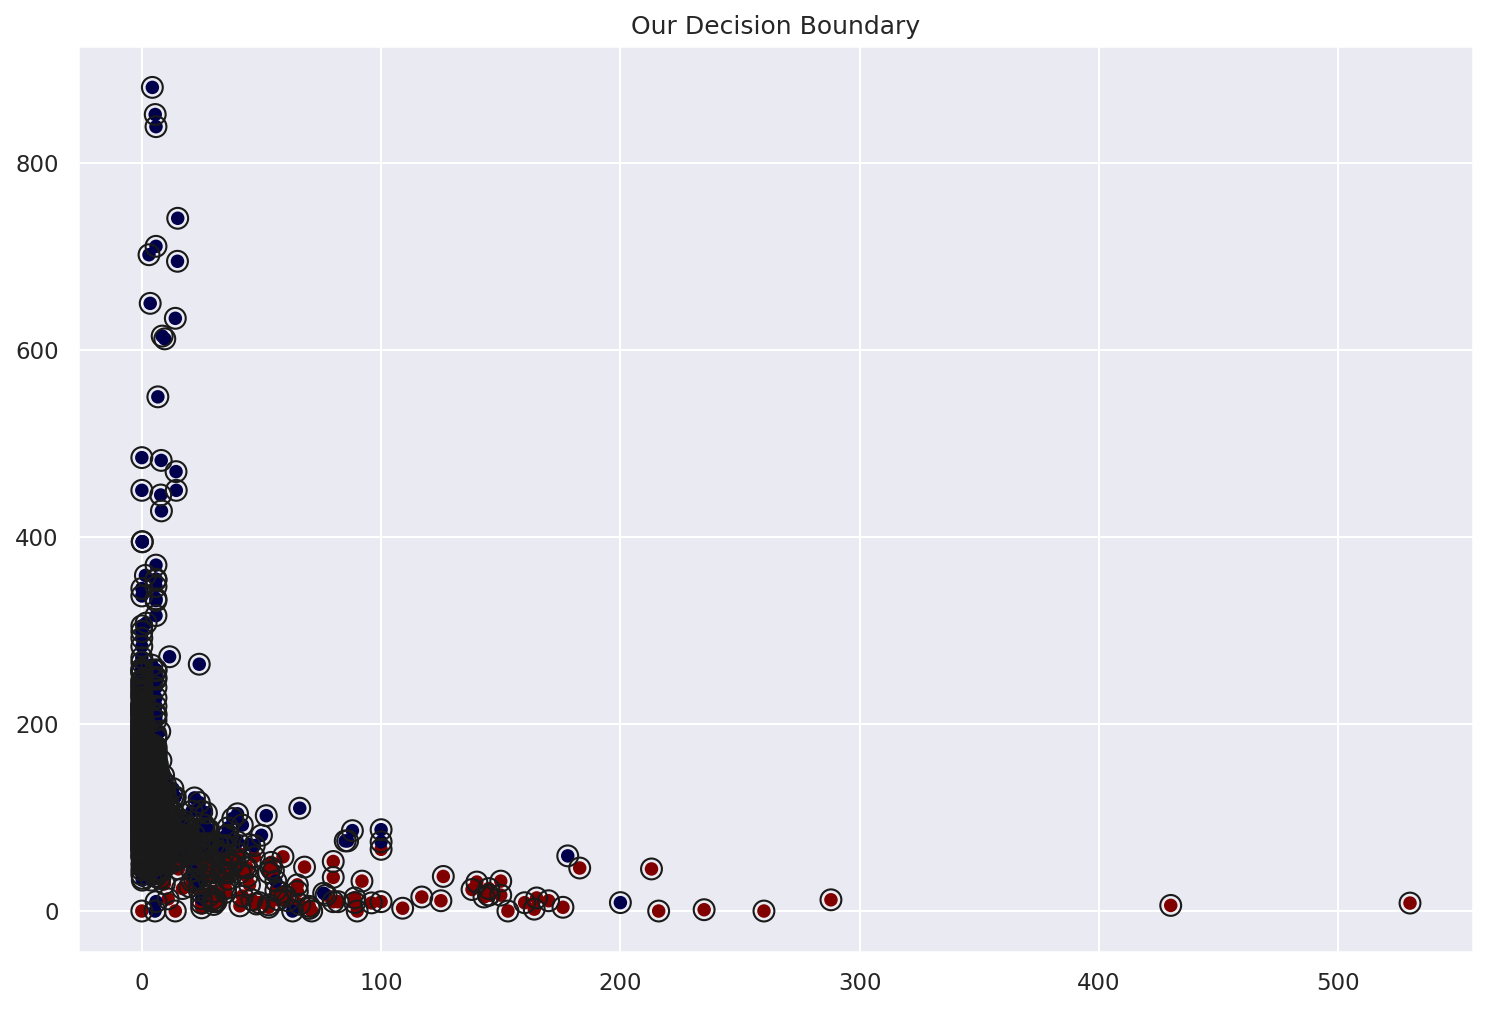

In [462]:
#Instantiating Our Model
model_rbf = SVC(kernel='rbf', C=1, gamma= 0.7)

#Fitting
model_rbf.fit(X, y)

#Calling Our Plot function
plot_svm_boundary(model_rbf, X, y)

Clear overfititng case suggesting that our RBF model may not be the best model

# **3. Sigmoid**

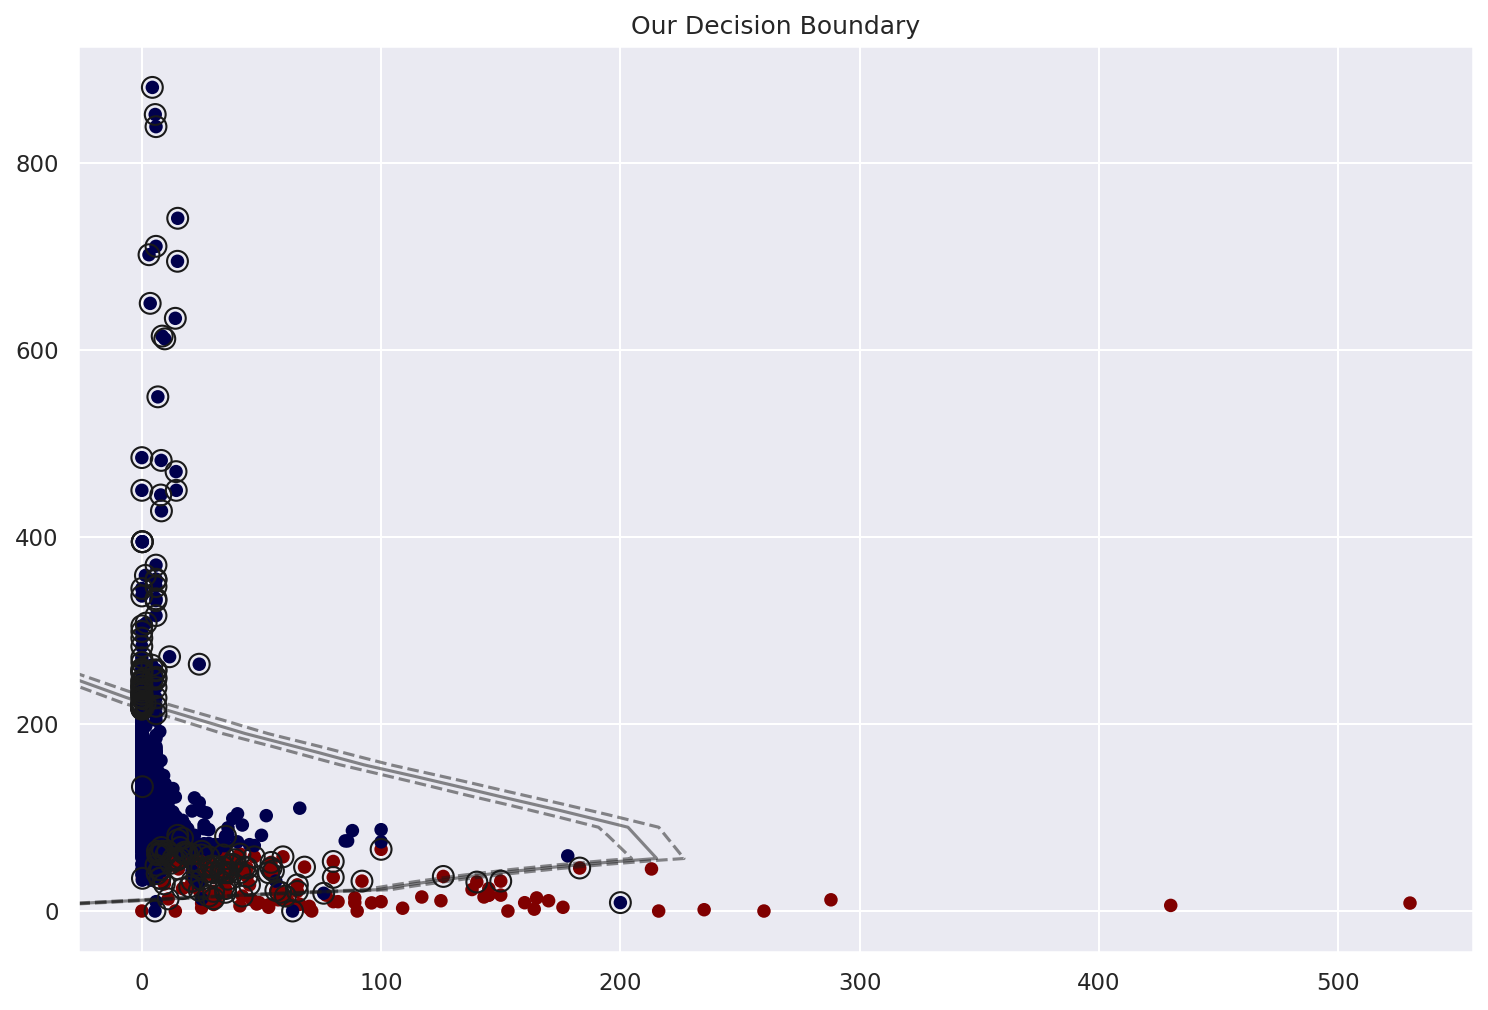

In [463]:
#Instantiating Our Model
model_sig = SVC(kernel='sigmoid')

#Fitting
model_sig.fit(X, y)

#Calling Our Plot function
plot_svm_boundary(model_sig, X, y)

Clearly not the best model for this model as it is attracted to the noise in certain points of the data.

# **4. Polynomial**

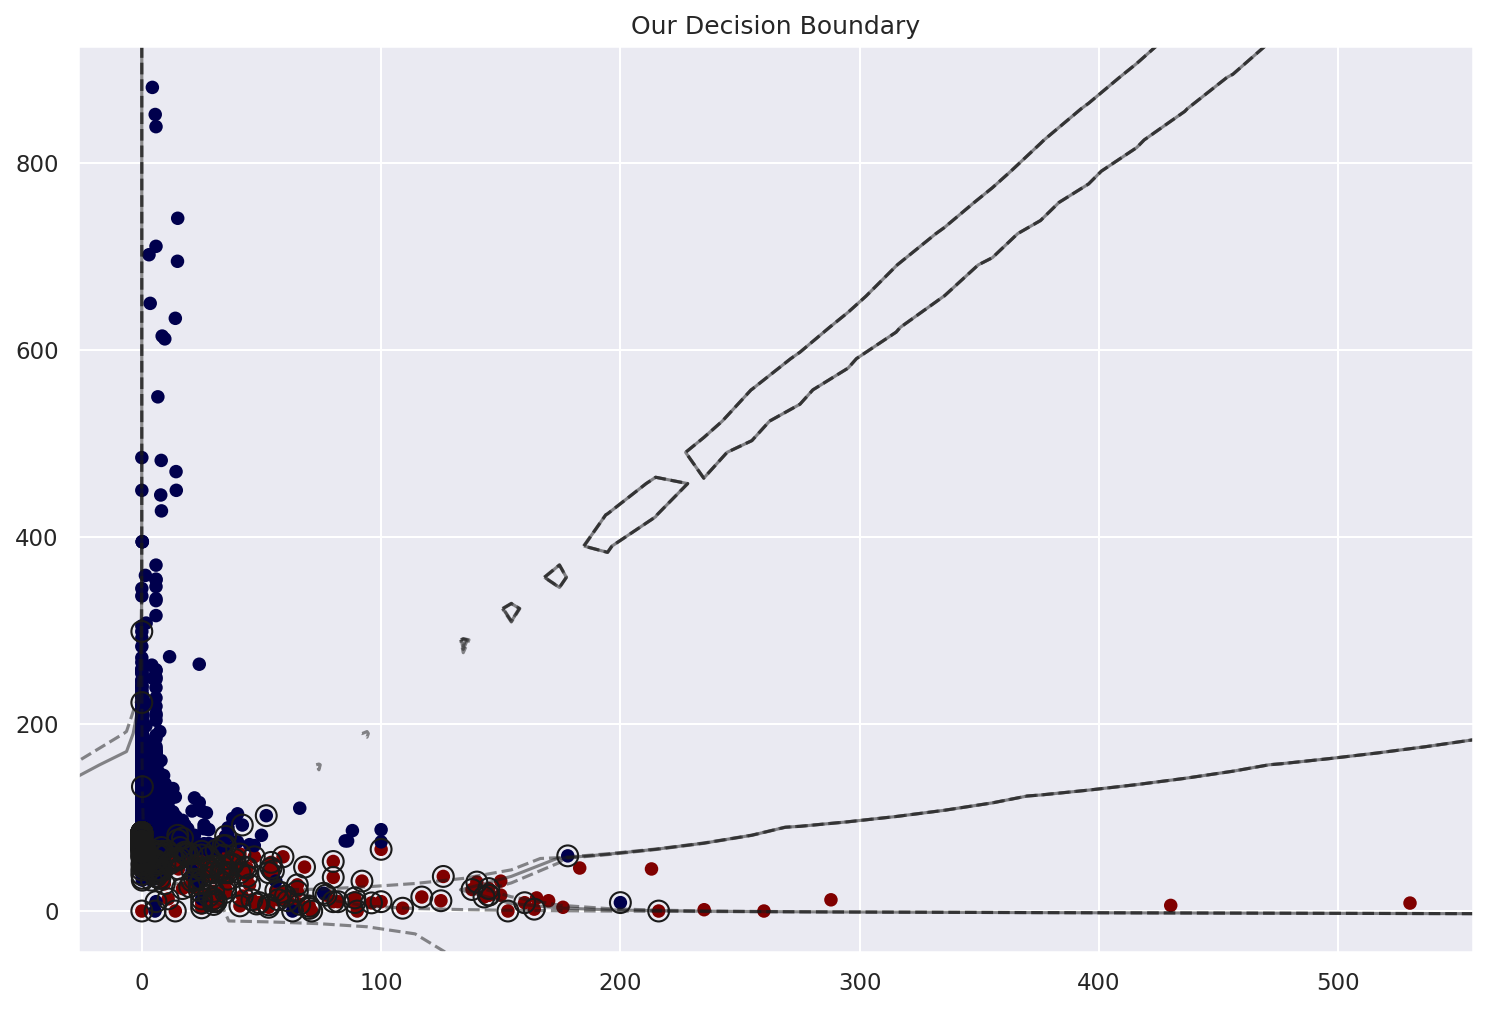

In [466]:
model_poly = SVC(kernel='poly', degree=8)
model_poly.fit(X,y)
plot_svm_boundary(model_poly, X, y)

# **Hyperparameter Tuning**

In [467]:
#Importing GridSearch CV
from sklearn.model_selection import GridSearchCV

In [468]:
#Instantiating Our model and specifying the parameters to test
sv_machine = SVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1], 'kernel':['linear', 'rbf', 'poly']}

In [470]:
#Passing Our model and parameters into the grid
grid =GridSearchCV(sv_machine, param_grid)

In [471]:
#Fitting model
grid.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [472]:
#Deriving Our Best Params
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

The Radio Basis Function is selected as the best perfroming model for this data. We will use it to build our SVM model

In [473]:
#Create and define our Independent variables
X= new_df.drop('status', axis=1)

#Our Dependent Variable
y= new_df['status']

#Splitting Our data before scaling
#Importing Train_Test_Split method from Sklearn
from sklearn.model_selection import train_test_split

#Splitting Our Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [474]:
#We need to standardize our data to before working with SVM.
#We have outliers in our dataset and would like ensure the model
#looks at all the values the same. 
#To do this we leverage SK Learn 

from sklearn.preprocessing import StandardScaler

#Instantiaitng Our Scaler

scaler = StandardScaler()

#Fitting X_train to the scaler

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [475]:
#Transforming Our data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [476]:
#Instantiating Our Model
model = SVC(kernel='rbf', C=1)

#Fitting
model.fit(X_train, y_train)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [478]:
#Predictions
preds = model.predict(X_test)


# **Model Performance Evaluation**

In [479]:
#Leveraging SkLearn for the Performace Metric
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [480]:
#Computing Our Accuracy Scores
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       952
           1       0.88      0.68      0.77        41

    accuracy                           0.98       993
   macro avg       0.93      0.84      0.88       993
weighted avg       0.98      0.98      0.98       993



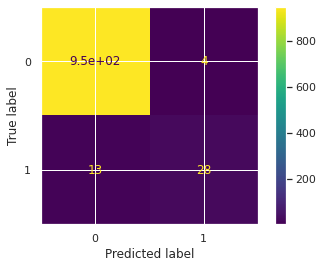

In [483]:
#Plotting Confusion Matrix

plot_confusion_matrix(model, X_test, y_test)

# **6. Conclusion and Recommendation**


**Conclusion**


In conclusion, all the tree models outperform the Support Vector Machine. We achieve an accuracy score of 0.99 with trees whilst the best SVM model (RBF) only yielded 98%. Furthermore, from the hyperplane visualization, it was evident that SVM would not be ideal for this data. 

**Challenging the Solution**

We've determined already that Thyroid Stimulating Hormone and Free Thyroxine Index play a big role in determining whether one is Hypothyroidic or not. Our results augment this view. 


**Follow Up Questions**

a) Did we have the right data?


Yes, no problem with the data. Were the data description to be provided, a better understanding of the problem would have been had.



b) Did we have the right question?


Yes. Question was whether a model could be model. We've achieved that. 